## Final Project Submission


* Student name: Mark Ehler
* Student pace: Part time
* Scheduled project review date/time: 12:00 3/25/2019
* Instructor name: Jeff Herman
* Blog post URL: https://docs.google.com/document/d/1FzDBSjEtQ6KXv58LeWxpmUEgRUM_Vt2hIqdf40upiCs/edit?usp=sharing
* Presentation Link: https://docs.google.com/presentation/d/1DQoqrS4sXwUvHfPFa7CXwok_-A5SzqJRFidpB1RiUJo/edit?usp=sharing


The goal of your project is to query the database to get the data needed to perform a statistical analysis. In this statistical analysis, you'll need to perform a hypothesis test (or perhaps several) to answer the following question:

*Do discounts have a statistically significant effect on the number of products customers order? If so, at what level(s) of discount?*

In addition to answering this question with a hypothesis test, you will also need to come up with at least 3 other hypotheses to test on your own. These can by anything that you think could be imporant information for the company.

For this hypothesis, be sure to specify both the null hypothesis and the alternative hypothesis for your question. You should also specify if this is one-tail or a two-tail test.

In [2]:
!dir /b

.gitignore
.ipynb_checkpoints
.learn
adventureworks2008_schema.gif
CONTRIBUTING.md
halfway-there.gif
index.ipynb
LICENSE.md
Mod 2 Final.ipynb
Northwind_ERD.png
Northwind_small.sqlite
README.md


In [3]:
import sqlite3 as sql
import pandas as pd

In [4]:

# Create the connection
cnx = sql.connect(r'Northwind_small.sqlite')

c = cnx.cursor()


In [5]:
c.execute(''' select name from sqlite_master where type = 'table';''')

tables = c.fetchall()
tables

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

In [6]:
#My best single guess at finding NULL values if there are any.
#Tests for NULLs and NaNs will continue throughout this notebook, along with sanity checks.
c.execute('''select * from Product where CategoryId is null''')
c.fetchall()

[]

In [7]:
c.execute(''' select * from OrderDetail;''')

c.fetchall()

[('10248/11', 10248, 11, 14, 12, 0.0),
 ('10248/42', 10248, 42, 9.8, 10, 0.0),
 ('10248/72', 10248, 72, 34.8, 5, 0.0),
 ('10249/14', 10249, 14, 18.6, 9, 0.0),
 ('10249/51', 10249, 51, 42.4, 40, 0.0),
 ('10250/41', 10250, 41, 7.7, 10, 0.0),
 ('10250/51', 10250, 51, 42.4, 35, 0.15),
 ('10250/65', 10250, 65, 16.8, 15, 0.15),
 ('10251/22', 10251, 22, 16.8, 6, 0.05),
 ('10251/57', 10251, 57, 15.6, 15, 0.05),
 ('10251/65', 10251, 65, 16.8, 20, 0.0),
 ('10252/20', 10252, 20, 64.8, 40, 0.05),
 ('10252/33', 10252, 33, 2, 25, 0.05),
 ('10252/60', 10252, 60, 27.2, 40, 0.0),
 ('10253/31', 10253, 31, 10, 20, 0.0),
 ('10253/39', 10253, 39, 14.4, 42, 0.0),
 ('10253/49', 10253, 49, 16, 40, 0.0),
 ('10254/24', 10254, 24, 3.6, 15, 0.15),
 ('10254/55', 10254, 55, 19.2, 21, 0.15),
 ('10254/74', 10254, 74, 8, 21, 0.0),
 ('10255/2', 10255, 2, 15.2, 20, 0.0),
 ('10255/16', 10255, 16, 13.9, 35, 0.0),
 ('10255/36', 10255, 36, 15.2, 25, 0.0),
 ('10255/59', 10255, 59, 44, 30, 0.0),
 ('10256/53', 10256, 53, 26.2,

In [8]:
test = pd.read_sql_query('''select * from Category;''', cnx)
test[:2]

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."


In [9]:
c.execute(''' select * from 'Order';''')

c.fetchall()

[(10248,
  'VINET',
  5,
  '2012-07-04',
  '2012-08-01',
  '2012-07-16',
  3,
  32.38,
  'Vins et alcools Chevalier',
  "59 rue de l'Abbaye",
  'Reims',
  'Western Europe',
  '51100',
  'France'),
 (10249,
  'TOMSP',
  6,
  '2012-07-05',
  '2012-08-16',
  '2012-07-10',
  1,
  11.61,
  'Toms Spezialitäten',
  'Luisenstr. 48',
  'Münster',
  'Western Europe',
  '44087',
  'Germany'),
 (10250,
  'HANAR',
  4,
  '2012-07-08',
  '2012-08-05',
  '2012-07-12',
  2,
  65.83,
  'Hanari Carnes',
  'Rua do Paço, 67',
  'Rio de Janeiro',
  'South America',
  '05454-876',
  'Brazil'),
 (10251,
  'VICTE',
  3,
  '2012-07-08',
  '2012-08-05',
  '2012-07-15',
  1,
  41.34,
  'Victuailles en stock',
  '2, rue du Commerce',
  'Lyon',
  'Western Europe',
  '69004',
  'France'),
 (10252,
  'SUPRD',
  4,
  '2012-07-09',
  '2012-08-06',
  '2012-07-11',
  2,
  51.3,
  'Suprêmes délices',
  'Boulevard Tirou, 255',
  'Charleroi',
  'Western Europe',
  'B-6000',
  'Belgium'),
 (10253,
  'HANAR',
  3,
  '2012-07

In [10]:
c.execute(''' select * from Customer;''')

c.fetchall()

[('ALFKI',
  'Alfreds Futterkiste',
  'Maria Anders',
  'Sales Representative',
  'Obere Str. 57',
  'Berlin',
  'Western Europe',
  '12209',
  'Germany',
  '030-0074321',
  '030-0076545'),
 ('ANATR',
  'Ana Trujillo Emparedados y helados',
  'Ana Trujillo',
  'Owner',
  'Avda. de la Constitución 2222',
  'México D.F.',
  'Central America',
  '05021',
  'Mexico',
  '(5) 555-4729',
  '(5) 555-3745'),
 ('ANTON',
  'Antonio Moreno Taquería',
  'Antonio Moreno',
  'Owner',
  'Mataderos  2312',
  'México D.F.',
  'Central America',
  '05023',
  'Mexico',
  '(5) 555-3932',
  None),
 ('AROUT',
  'Around the Horn',
  'Thomas Hardy',
  'Sales Representative',
  '120 Hanover Sq.',
  'London',
  'British Isles',
  'WA1 1DP',
  'UK',
  '(171) 555-7788',
  '(171) 555-6750'),
 ('BERGS',
  'Berglunds snabbköp',
  'Christina Berglund',
  'Order Administrator',
  'Berguvsvägen  8',
  'Luleå',
  'Northern Europe',
  'S-958 22',
  'Sweden',
  '0921-12 34 65',
  '0921-12 34 67'),
 ('BLAUS',
  'Blauer See 

In [11]:
products = pd.read_sql_query("SELECT * FROM Product", cnx)
products[:3]

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.0,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.0,13,70,25,0


# Discounts

### H1:  Discounts have a significant increase on the number of products a customer orders to the 95% confidence level. orders with discounts sales price >= sales price orders without discounts

### H0: There is no increase in the number of products a customer will buy if they use discounts.  Orders with discounts total price = price of orders without discounts
    
This is a one tailed test and the alpha is set at 0.1

if we fail to accept the null, which discount is statistically significant and at what lv? 1% 10% 25% etc.

Add a visualization.
we dont reject the null.  We fail to accept it.

In [12]:
tables

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

In [13]:
#Order Details. {0:OrderID, 1:ProductID. 2:UnitPrice, 3:Quantity, 4:Discount}
c.execute('''select * from OrderDetail''')
c.fetchall()

[('10248/11', 10248, 11, 14, 12, 0.0),
 ('10248/42', 10248, 42, 9.8, 10, 0.0),
 ('10248/72', 10248, 72, 34.8, 5, 0.0),
 ('10249/14', 10249, 14, 18.6, 9, 0.0),
 ('10249/51', 10249, 51, 42.4, 40, 0.0),
 ('10250/41', 10250, 41, 7.7, 10, 0.0),
 ('10250/51', 10250, 51, 42.4, 35, 0.15),
 ('10250/65', 10250, 65, 16.8, 15, 0.15),
 ('10251/22', 10251, 22, 16.8, 6, 0.05),
 ('10251/57', 10251, 57, 15.6, 15, 0.05),
 ('10251/65', 10251, 65, 16.8, 20, 0.0),
 ('10252/20', 10252, 20, 64.8, 40, 0.05),
 ('10252/33', 10252, 33, 2, 25, 0.05),
 ('10252/60', 10252, 60, 27.2, 40, 0.0),
 ('10253/31', 10253, 31, 10, 20, 0.0),
 ('10253/39', 10253, 39, 14.4, 42, 0.0),
 ('10253/49', 10253, 49, 16, 40, 0.0),
 ('10254/24', 10254, 24, 3.6, 15, 0.15),
 ('10254/55', 10254, 55, 19.2, 21, 0.15),
 ('10254/74', 10254, 74, 8, 21, 0.0),
 ('10255/2', 10255, 2, 15.2, 20, 0.0),
 ('10255/16', 10255, 16, 13.9, 35, 0.0),
 ('10255/36', 10255, 36, 15.2, 25, 0.0),
 ('10255/59', 10255, 59, 44, 30, 0.0),
 ('10256/53', 10256, 53, 26.2,

In [14]:
#Join Order Details on Orders
c.execute('''select * from OrderDetail join 'Order' on OrderID ''')
c.fetchall()

[('10248/11',
  10248,
  11,
  14,
  12,
  0.0,
  10248,
  'VINET',
  5,
  '2012-07-04',
  '2012-08-01',
  '2012-07-16',
  3,
  32.38,
  'Vins et alcools Chevalier',
  "59 rue de l'Abbaye",
  'Reims',
  'Western Europe',
  '51100',
  'France'),
 ('10248/11',
  10248,
  11,
  14,
  12,
  0.0,
  10249,
  'TOMSP',
  6,
  '2012-07-05',
  '2012-08-16',
  '2012-07-10',
  1,
  11.61,
  'Toms Spezialitäten',
  'Luisenstr. 48',
  'Münster',
  'Western Europe',
  '44087',
  'Germany'),
 ('10248/11',
  10248,
  11,
  14,
  12,
  0.0,
  10250,
  'HANAR',
  4,
  '2012-07-08',
  '2012-08-05',
  '2012-07-12',
  2,
  65.83,
  'Hanari Carnes',
  'Rua do Paço, 67',
  'Rio de Janeiro',
  'South America',
  '05454-876',
  'Brazil'),
 ('10248/11',
  10248,
  11,
  14,
  12,
  0.0,
  10251,
  'VICTE',
  3,
  '2012-07-08',
  '2012-08-05',
  '2012-07-15',
  1,
  41.34,
  'Victuailles en stock',
  '2, rue du Commerce',
  'Lyon',
  'Western Europe',
  '69004',
  'France'),
 ('10248/11',
  10248,
  11,
  14,
  1

In [15]:
#all the levels of discounts
c.execute('''select discount as "discount %" from OrderDetail group by discount;''')
c.fetchall()

[(0.0,),
 (0.01,),
 (0.02,),
 (0.03,),
 (0.04,),
 (0.05,),
 (0.06,),
 (0.1,),
 (0.15,),
 (0.2,),
 (0.25,)]

In [16]:
#selecting only the discounted items
c.execute('''select * from OrderDetail where discount != 0;''')
c.fetchall()

[('10250/51', 10250, 51, 42.4, 35, 0.15),
 ('10250/65', 10250, 65, 16.8, 15, 0.15),
 ('10251/22', 10251, 22, 16.8, 6, 0.05),
 ('10251/57', 10251, 57, 15.6, 15, 0.05),
 ('10252/20', 10252, 20, 64.8, 40, 0.05),
 ('10252/33', 10252, 33, 2, 25, 0.05),
 ('10254/24', 10254, 24, 3.6, 15, 0.15),
 ('10254/55', 10254, 55, 19.2, 21, 0.15),
 ('10258/2', 10258, 2, 15.2, 50, 0.2),
 ('10258/5', 10258, 5, 17, 65, 0.2),
 ('10258/32', 10258, 32, 25.6, 6, 0.2),
 ('10260/41', 10260, 41, 7.7, 16, 0.25),
 ('10260/62', 10260, 62, 39.4, 15, 0.25),
 ('10260/70', 10260, 70, 12, 21, 0.25),
 ('10262/5', 10262, 5, 17, 12, 0.2),
 ('10263/16', 10263, 16, 13.9, 60, 0.25),
 ('10263/30', 10263, 30, 20.7, 60, 0.25),
 ('10263/74', 10263, 74, 8, 36, 0.25),
 ('10264/41', 10264, 41, 7.7, 25, 0.15),
 ('10266/12', 10266, 12, 30.4, 12, 0.05),
 ('10267/59', 10267, 59, 44, 70, 0.15),
 ('10267/76', 10267, 76, 14.4, 15, 0.15),
 ('10269/33', 10269, 33, 2, 60, 0.05),
 ('10269/72', 10269, 72, 27.8, 20, 0.05),
 ('10273/10', 10273, 10,

In [17]:
#collecing the database I will need to complete this hypothesis
c.execute('''select discount, quantity, UnitPrice, OrderID, CustomerID
            from OrderDetail join 'Order' on OrderID; ''')
discounts = pd.read_sql_query('''select discount, quantity, UnitPrice, OrderID, CustomerID
            from OrderDetail inner join 'Order' on OrderDetail.OrderID = 'Order'.Id; ''', cnx)
discounts['AdjustedPrice'] = (discounts['UnitPrice'] * (1 - discounts['Discount']))
discounts.Discount.unique()

array([0.  , 0.15, 0.05, 0.2 , 0.25, 0.1 , 0.02, 0.03, 0.04, 0.06, 0.01])

In [18]:
discounts.isnull().sum()

Discount         0
Quantity         0
UnitPrice        0
OrderId          0
CustomerId       0
AdjustedPrice    0
dtype: int64

In [19]:
discounts.shape

(2155, 6)

In [20]:
discounts[:10]

,Discount,Quantity,UnitPrice,OrderId,CustomerId,AdjustedPrice
0,0.00,12,14.0,10248,VINET,14.00
1,0.00,10,9.8,10248,VINET,9.80
2,0.00,5,34.8,10248,VINET,34.80
3,0.00,9,18.6,10249,TOMSP,18.60
4,0.00,40,42.4,10249,TOMSP,42.40
5,0.00,10,7.7,10250,HANAR,7.70
6,0.15,35,42.4,10250,HANAR,36.04
7,0.15,15,16.8,10250,HANAR,14.28
8,0.05,6,16.8,10251,VICTE,15.96
9,0.05,15,15.6,10251,VICTE,14.82


The following Pandas tables include the information needed to test the hypothesis and additional information that might be required to test additional dependant hypotheses.

In [21]:
no_discounts = pd.read_sql_query('''select OrderDetail.id, discount, quantity, UnitPrice, OrderID, CustomerID
            from OrderDetail inner join 'Order' on OrderDetail.OrderID = 'Order'.Id where discount = 0; ''', cnx)
discounts = pd.read_sql_query('''select discount, quantity, UnitPrice, OrderID, CustomerID
            from OrderDetail inner join 'Order' on OrderDetail.OrderID = 'Order'.Id where discount > 0; ''', cnx)
discounts[:5]

,Discount,Quantity,UnitPrice,OrderId,CustomerId
0,0.15,35,42.4,10250,HANAR
1,0.15,15,16.8,10250,HANAR
2,0.05,6,16.8,10251,VICTE
3,0.05,15,15.6,10251,VICTE
4,0.05,40,64.8,10252,SUPRD


In [22]:
print(discounts.shape, no_discounts.shape)

(838, 5) (1317, 6)


Obtain samples of each discount and no_discount.  Find mu and sigma of the populations. determine an effect size.

In [23]:
discount_samp = discounts.sample(830)
no_discount_samp = no_discounts.sample(830)

discount_ = discount_samp['Quantity']
no_discount_ = no_discount_samp['Quantity']


In [24]:
import numpy as np
mu_discount, mu_no_discount = np.mean(discount_samp['Quantity']), np.mean(no_discount_samp['Quantity'])
print(mu_discount, mu_no_discount)

27.143373493975904 21.20843373493976


In [25]:
sd_discount, sd_no_discount = np.std(discount_samp['Quantity']), np.std(no_discount_samp['Quantity'])
print(sd_discount, sd_no_discount)

20.800195161104146 17.31838430386078


We can tell from the population  average and standard deviations that the two categories are close in numbers.  Further, the discounts have a wider range of distribution, meaning that even with a higher average, it might also be spread lower than the orders with no discount.  This warrents further testing.

In [27]:
import scipy.stats as st

def compute_n(alpha, beta, mu_0, mu_1, var):
    z_alpha = st.norm.ppf(alpha)
    z_beta = st.norm.ppf(beta)
    num = ((z_alpha+z_beta)**2)*var
    den = (mu_1 - mu_0)**2
    return num/den

alpha = .05 #Part of A/B test design
beta = .05 #Part of A/B test design
mu_0 = mu_discount #Part of A/B test design
mu_1 = mu_no_discount #Part of A/B test design
sample_var = (sd_discount**2) + (sd_no_discount**2) / ((len(discount_)+len(no_discount_))-2) #sample variance

sample_var

432.8290152628769

In [28]:
n_size = compute_n(alpha, beta, mu_0, mu_1, 18.1886)
n_size

5.588318455287544

We have a large enough sample size to determine our Hypothesis with a high degree of confidence.

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


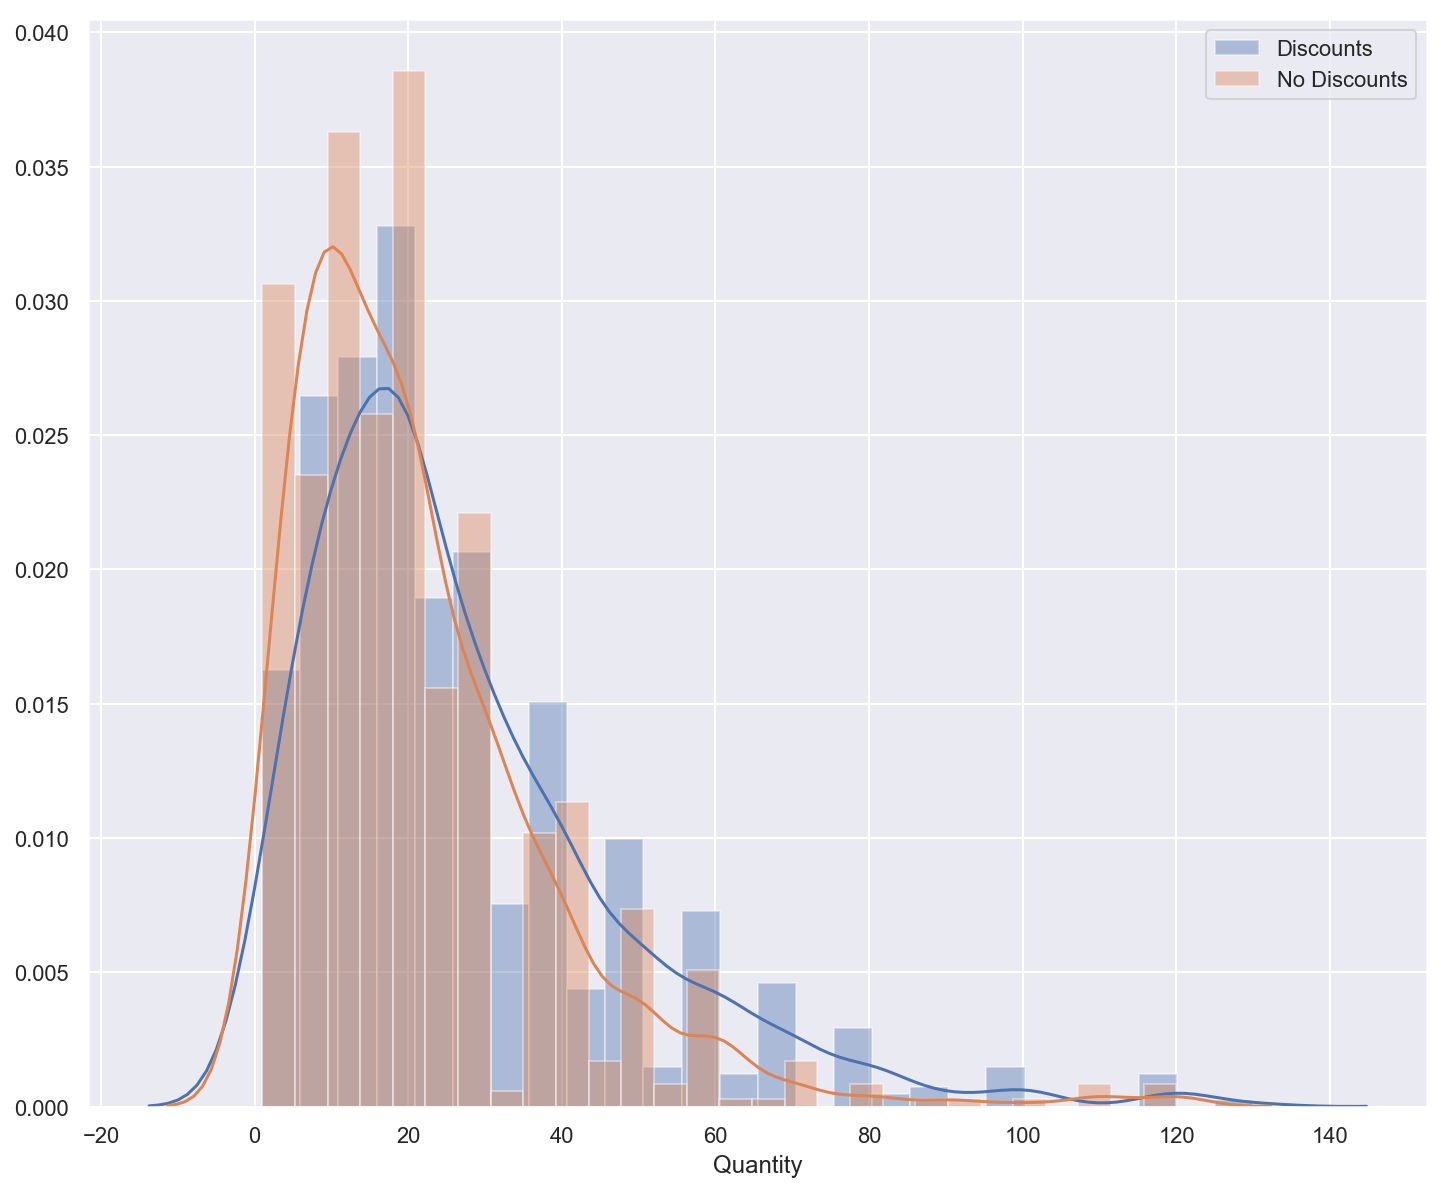

In [30]:

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(discount_, label='Discounts')
sns.distplot(no_discount_, label='No Discounts') 
plt.legend()
plt.show();

In [32]:
#Two Sample T Test

mu1 = discount_.mean()
mu2 = no_discount_.mean()
std1 = discount_.std(ddof=1)
std2 = no_discount_.std(ddof=1)
n1 = len(discount_)
n2 = len(no_discount_)

num = (n1-1)*std1**2 + (n2-1)*std2**2
den = n1 + n2 - 2
pooled_std = np.sqrt(num/den)
pooled_std

19.150172822466146

In [33]:
se = pooled_std*np.sqrt((n2+n1)/(n1*n2))
se

0.940045011906564

In [34]:
t = ((mu1-mu2)/se)
t

6.313463380864202

In [35]:

## Calculate p_value
# Lower tail comulative density function returns area under the lower tail curve

#Comulative density function returns area under upper tail curve
p_value = 1. - st.t.cdf(t, ((len(discount_)+len(no_discount_))-2), 0, 1)
print(p_value)

if p_value < 0.05:
    print(" HA = mu0 < H0: We reject the Null.")
else:
    print(" H0 = mu0 == HA: We fail to reject the Null.")

#stats.t.sf(abs(t_stat), len(experimental)+len(control)-1) * 2

1.7474988123211688e-10
 HA = mu0 < H0: We reject the Null.


The probability of rejecting the H0 when it would be true is acceptably low

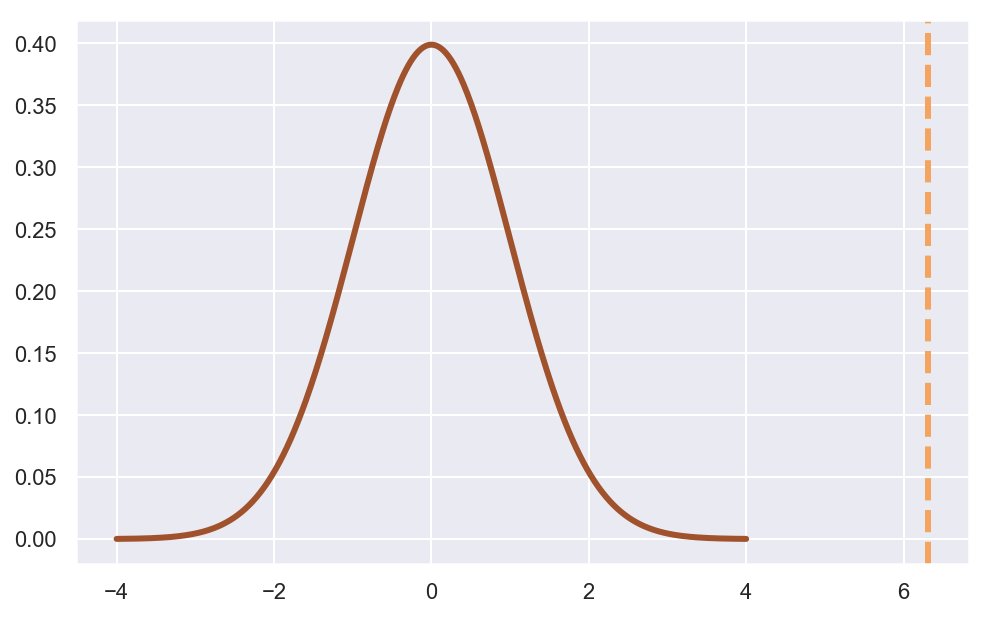

In [54]:
# Visualize p_value
%store -r colors
def visualize_t(t_stat, n_control, n_experimental):

    # initialize a matplotlib figure
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    # generate standard deviation spread -4 and 4:
    xs = np.linspace(-4, 4, 500)

    # use stats.t.pdf to get values on the probability density function for the t-distribution
    
    ys= st.t.pdf(xs, (n_control+n_experimental-2), 0, 1)
    ax.plot(xs, ys, linewidth=3, color=colors[np.random.randint(len(colors))])

    ax.axvline(t_stat, color=colors[np.random.randint(len(colors))], linestyle='--', lw=3)

    plt.show()
    return None

n_control = len(discount_)
n_experimental = len(no_discount_)
visualize_t(t, n_control, n_experimental)

### PDF

In [167]:
import scipy.stats

discounts_rv = scipy.stats.norm(mu1, std1)
no_discounts_rv = scipy.stats.norm(mu2, std2)

In [170]:
print(discounts_rv)

942.3257774566473

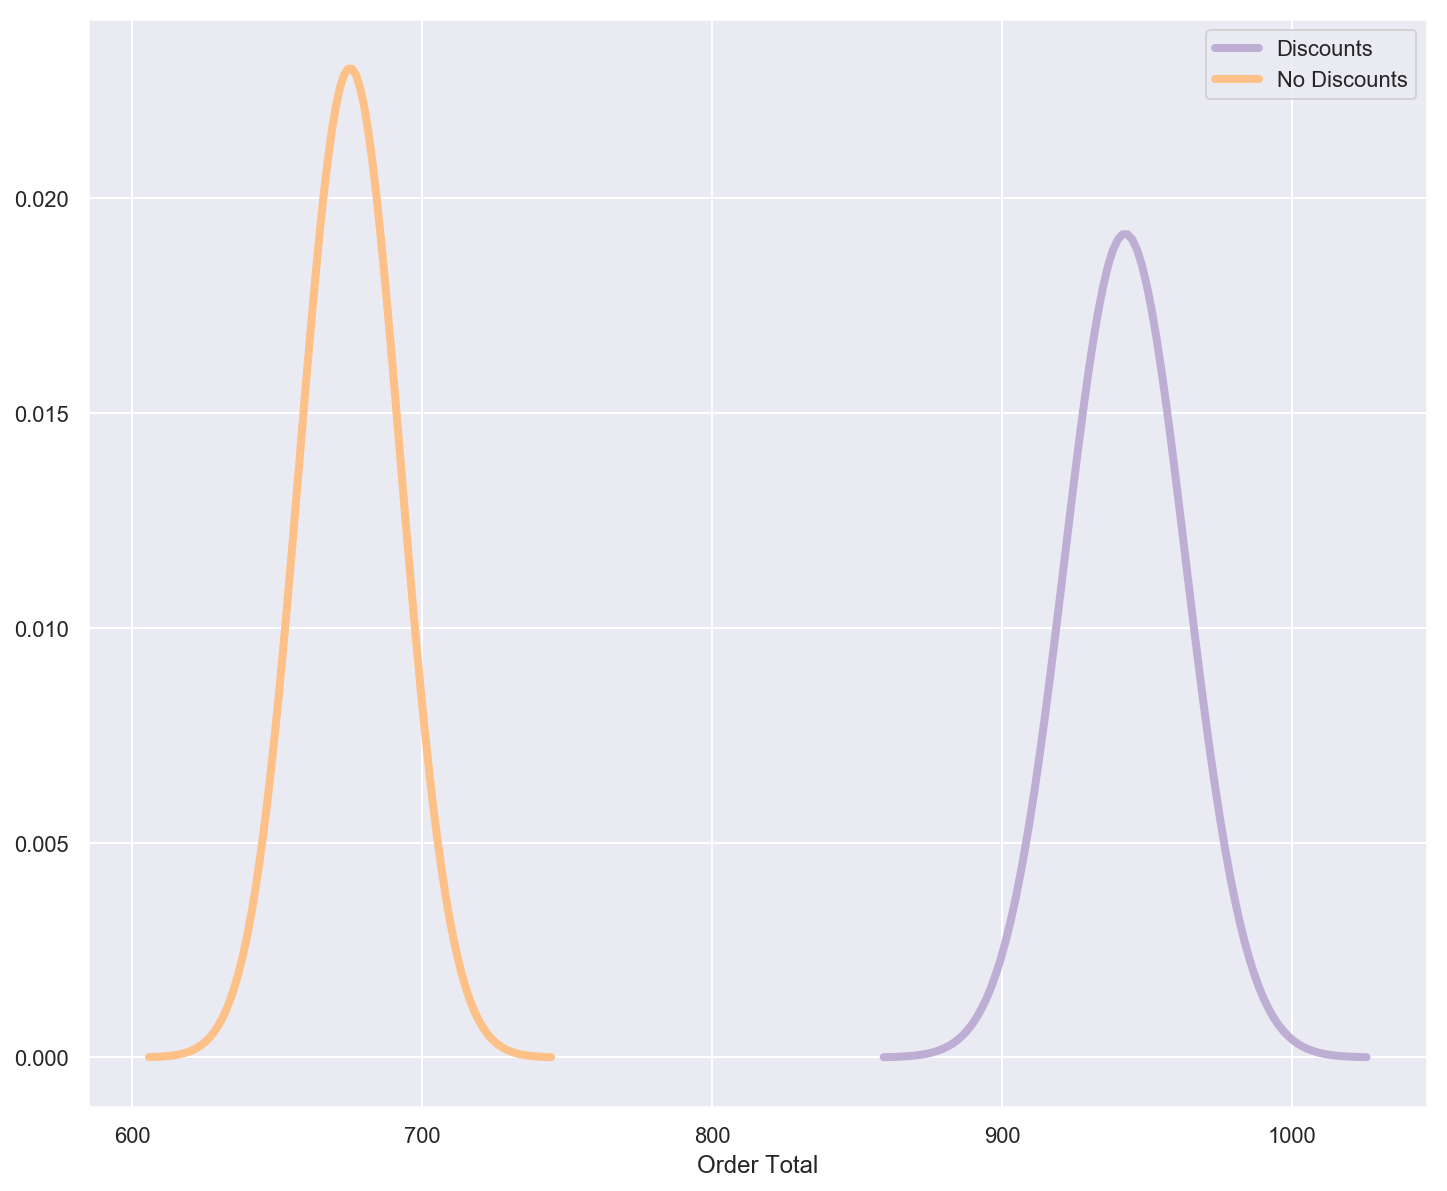

In [174]:

def evaluate_PDF(rv, x=4):
    '''Input: a random variable object, standard deviation
       output : x and y values for the normal distribution
       '''
    
    # Identify the mean and standard deviation of random variable 
    mean = rv.mean()
    std = rv.std()

    # Use numpy to calculate evenly spaced numbers over the specified interval (4 sd) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)
    
    # Calculate the peak of normal distribution i.e. probability density. 
    ys = rv.pdf(xs)

    return xs, ys # Return calculated values
 

# Discounts
xs, ys = evaluate_PDF(discounts_rv)
plt.plot(xs, ys, label='Discounts', linewidth=4, color='#beaed4') 

#No Discounts
xs, ys = evaluate_PDF(no_discounts_rv)
plt.plot(xs, ys, label='No Discounts', linewidth=4, color='#fdc086')

plt.xlabel('Order Total')
plt.legend(loc='upper right')


### Summary
There is enough evidence to support the claim that orders with discounts are placed with a larger quantity than orders without discounts.

We fail to accept the null, which discount is statistically significant and at what lv? 1% 10% 25% etc.

*H0i == HAi vs H0i < HAi where i is the each of the discount levels compared to no discounts*

In [38]:


discount_lvs = [0.15, 0.05, 0.2 , 0.25, 0.1 , 0.02, 0.03, 0.04, 0.06, 0.01]
discounts_ = []
for i in range(len(discount_lvs)):
    discounts_.append(np.array(discounts['Quantity'][discounts['Discount'] == discount_lvs[i]]))
discounts_

[array([ 35,  15,  15,  21,  25,  70,  15,  40,  15,  21,  70,  40,  80,
         50,  25,   9,  50,   6,  15,  20,  15,  20,  20,  20,  10,  18,
         21,  70,   4,  15,  10,  18,  45,  49,  24,  90,  40,  21,  40,
         35,   2,  35,  60,  42,  15,   7,  15,  15,  50,  50,  10,  10,
          9,   6,  12,  16,  16,  84,   8,  30,  30,  70,  24,  55, 100,
         48,  40,  20,  35,  18,  11,  28,  24,  10,   4,  30,  35,  36,
         13,  35,  80,  15,  24,  12,  15,  30,   8,  60,  30,  15,  42,
         20,  35,  28,   5,  40,  25,   2,  30,   3,  20,  20,  20,   4,
         20,  50,  20,   8,  30,  40,  60,  25,  18,  20,   4,  30, 100,
         65,  15,  20,  12,  20,  32,   8,  30,   6,  25,  12,  42,  10,
         40,  28,  25,  24,  20,   2,  12,  12,  20,  40,   6,  84,  60,
         65,  66,  15,  24,  24,   8,  36,  28,  40,  20,  30,  10,  30,
          2], dtype=int64),
 array([  6,  15,  40,  25,  12,  60,  20,  24,  15,  60,  33,  12,   6,
         10,   8,  20, 

In [39]:
discounts[discounts['Discount'] == 0.02]

,Discount,Quantity,UnitPrice,OrderId,CustomerId
826,0.02,1,25.0,11077,RATTC
834,0.02,3,12.0,11077,RATTC


We can exclude the discount levels of [02%, 03%, 04%, 06%, 01%] from further testing <br> their sample sizes are less than 5.

In [40]:
for i in range(len(discount_lvs)):
    print(f'Sample size for discounts at the level of {discount_lvs[i]} == {len(discounts_[i])}')


Sample size for discounts at the level of 0.15 == 157
Sample size for discounts at the level of 0.05 == 185
Sample size for discounts at the level of 0.2 == 161
Sample size for discounts at the level of 0.25 == 154
Sample size for discounts at the level of 0.1 == 173
Sample size for discounts at the level of 0.02 == 2
Sample size for discounts at the level of 0.03 == 3
Sample size for discounts at the level of 0.04 == 1
Sample size for discounts at the level of 0.06 == 1
Sample size for discounts at the level of 0.01 == 1


In [43]:
no_discounts_ = []
for i in range(len(discount_lvs)):
    no_discounts_.append(np.array(no_discounts['Quantity'].sample(len(discounts_[i]))))
print(len(no_discounts_[0]),len(discounts_[0]))

157 157


In [47]:
discounts_ = discounts_[:5]
no_discounts_ = no_discounts_[:5]

'''
discount_samp = discounts.sample(1300)
no_discount_samp = no_discounts.sample(1300)

control_samp = no_discount_samp['Quantity']
'''
no_discounts_[1]

array([ 12,  50,  20,  20,  30,   9,   3,  12,  15,  35,  20,  20,  20,
        30,  16,  18,  36,  20,  28,   5,  20,  12,  42,  15,  20,   6,
        10, 120,   2,   4,  15,  25,  35,  21,   5,  30,  10,  30,   8,
        60,  10,   8,  25,   2,  13,  20,  25,  15,  24,  30,  30,   2,
        60,   6,  36,   6,  10,  60,  10,  20,  12,  12,  15,   2,   3,
        24,  35,  30,   6,  15,   2,  35,  10,  35,  15,  25,  42,   5,
        16,  10,   4,  20, 100,   9,  20,  20,  20,   8,  21,  25,  48,
        20,  21,  15,  70,   1,  20,  25,  35,  10,  15,  18,  16,   4,
         5,  30,  35,  21,  15,  20,   3,  18,  60,  20,  35,  10,  16,
        60,  20,  10,   6,  15,  12,  45,  24,  15,  40,  10,  16,  30,
        20,  60,   5,  21,  12,  20,  30,  20,  18,   3,  30,  30,   7,
         8,  40,  40,  30,   4,  15,  10,  40,  21,  20,   2,  50,   3,
        10,   2,   3,  40,  40,   8,  18,  24,  50,  20,   6,  15,  45,
        44,  25,   6,  10,  24,  25,   3,  35,  21,   6,  15,  4

In [58]:
from scipy.stats import ttest_ind
discounts_pval = []
discounts_tstat = []
for i in range(len(no_discounts_)):
    tstat, p_val = ttest_ind(discounts_[i], no_discounts_[i])
    print(f'for Discount Level {discount_lvs[i]}, P Value = {p_val}')
    discounts_pval.append(p_val)
    discounts_tstat.append(tstat)
discounts_pval

for Discount Level 0.15, P Value = 0.003899114297712308
for Discount Level 0.05, P Value = 0.0028292023288866617
for Discount Level 0.2, P Value = 0.006917136252883391
for Discount Level 0.25, P Value = 4.77333721632627e-05
for Discount Level 0.1, P Value = 0.01175638486446167


[0.003899114297712308,
 0.0028292023288866617,
 0.006917136252883391,
 4.77333721632627e-05,
 0.01175638486446167]

By looking at this we can tell that the P Value for discounts of 20% have the smallest P values.  We can infer that it means the 20% discounts have the largest quantity.  Lets visualize this another way.

 Discount Level: 0.15: Probability of error: 0.003899114297712308


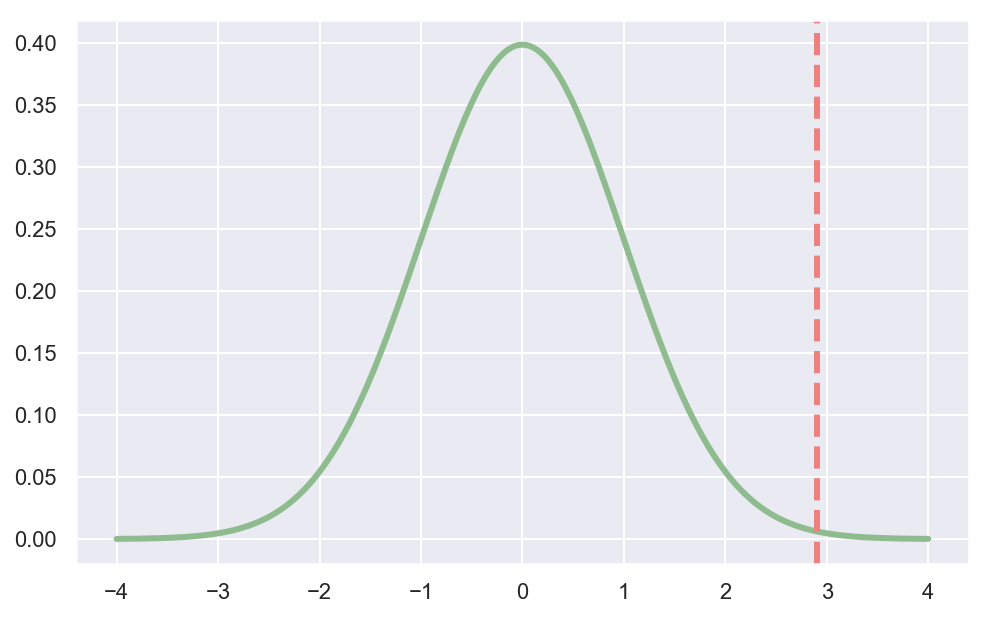

 Discount Level: 0.05: Probability of error: 0.0028292023288866617


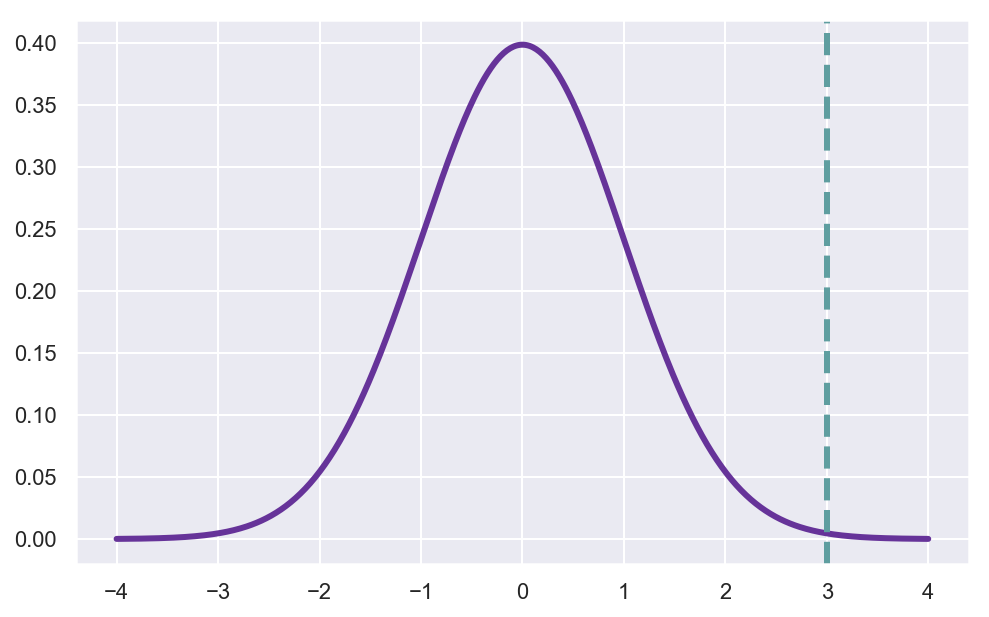

 Discount Level: 0.2: Probability of error: 0.006917136252883391


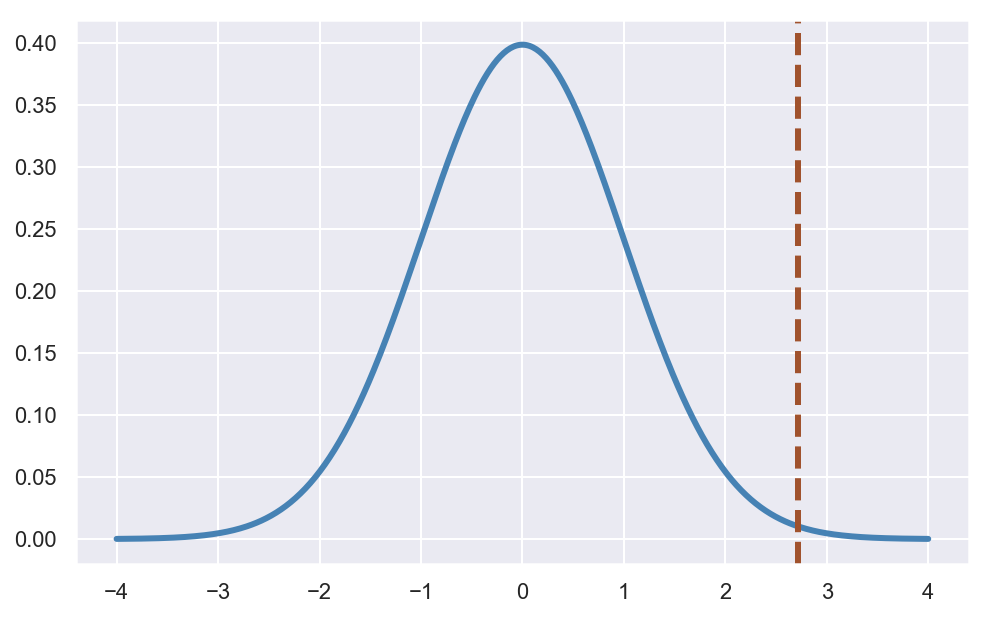

 Discount Level: 0.25: Probability of error: 4.77333721632627e-05


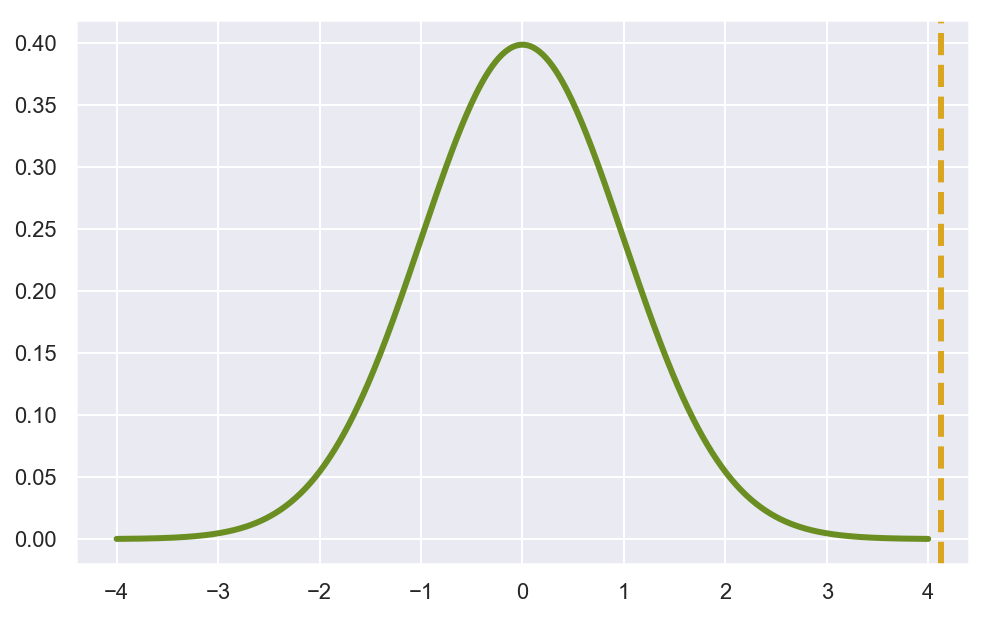

 Discount Level: 0.1: Probability of error: 0.01175638486446167


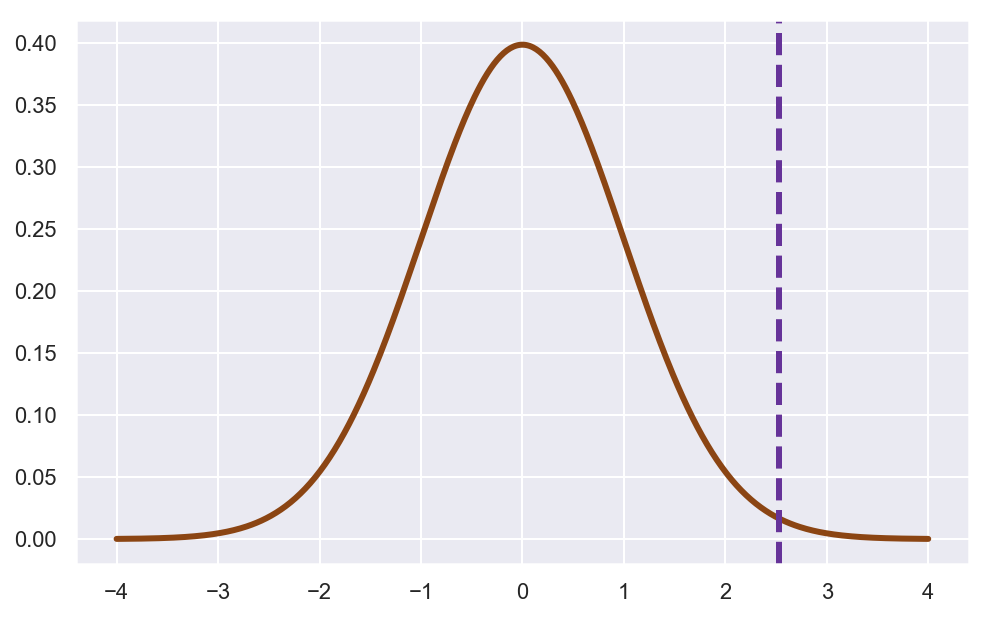

In [59]:
for i in range(len(no_discounts_)):
    print(f' Discount Level: {discount_lvs[i]} ~~ Probability of error: {discounts_pval[i]}')
    visualize_t(discounts_tstat[i], len(no_discounts_[i]), len(discounts_[i]))

### Overlap


In [231]:
def overlap_superiority(group1, group2):
    """Estimates overlap and superiority based on a sample.  Level Up: echo this."""
    n = len(group1 + group2)

    # Get a sample of size n from both groups
    mu1 = group1.mean()
    sd1 = group1.std(ddof=1)
    mu2 = group2.mean()
    sd2 = group2.std(ddof=1)
    group1_rv = scipy.stats.norm(mu1, std1)
    group2_rv = scipy.stats.norm(mu1, std1)
    group1_sample = len(group1)
    group2_sample = len(group2)
    
    # Identify the threshold between samples
    thresh = (mu1 + mu2) / 2
    print(f'     Simple Threshold: {int(thresh)}\nThe midpoint between two means.')
    
    # Calculate no. of values above and below for group 1 and group 2 respectively
    above = sum(group1 < thresh)
    below = sum(group2 > thresh)
    
    # Calculate the overlap
    overlap = (above + below) / n
    
    #calculate misclassification rate
    
    misclassify = overlap / 2
    
    # Calculate probability of superiority
    superiority = sum(x > y for x, y in zip(group1, group2)) / n
    print(f'''\n     Overlap: {round(overlap,4)}\nThe total AUC.\n
    Superiority: {round(superiority*100,2)}\nProbability that a randomly chosen sample from the first group is [higher] than one of the second group.\n
    Misclassification Rate: {round(misclassify,4)}\nThe chance of misclassification if using this metric alone as a predictor.''')
    

    return overlap, superiority


In [242]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d


def plot_pdfs(sample1, sample2, cohen_d):
    """Plot PDFs for distributions that differ by some number of stds.
    
    cohen_d: number of standard deviations between the means

    group1 = scipy.stats.norm(0, 1)
    group2 = scipy.stats.norm(cohen_d, 1)
        """
    sample1_rv = scipy.stats.norm(sample1.mean(),sample1.std(ddof=1))
    xs, ys = evaluate_PDF(sample1_rv)
    plt.fill_between(xs, ys, label='Experiment', color=colors[np.random.randint(len(colors))], alpha=0.7)
    
    sample2_rv = scipy.stats.norm(sample2.mean(),sample2.std(ddof=1))
    xs, ys = evaluate_PDF(sample2_rv)
    plt.fill_between(xs, ys, label='Control', color=colors[np.random.randint(len(colors))], alpha=0.7)
    plt.title('2 Sample PDF')
    plt.legend(loc='upper right')
    plt.ylabel('Density')
    plt.xlabel('Distribution')
    
    overlap_superiority(sample1,sample2)
    return 


 Discount Level: 0.15
     Simple Threshold: 25
The midpoint between two means.

     Overlap: 0.9045
The total AUC.

    Superiority: 54.78
Probability that a randomly chosen sample from the first group is [higher] than one of the second group.

    Misclassification Rate: 0.4522
The chance of misclassification if using this metric alone as a predictor.


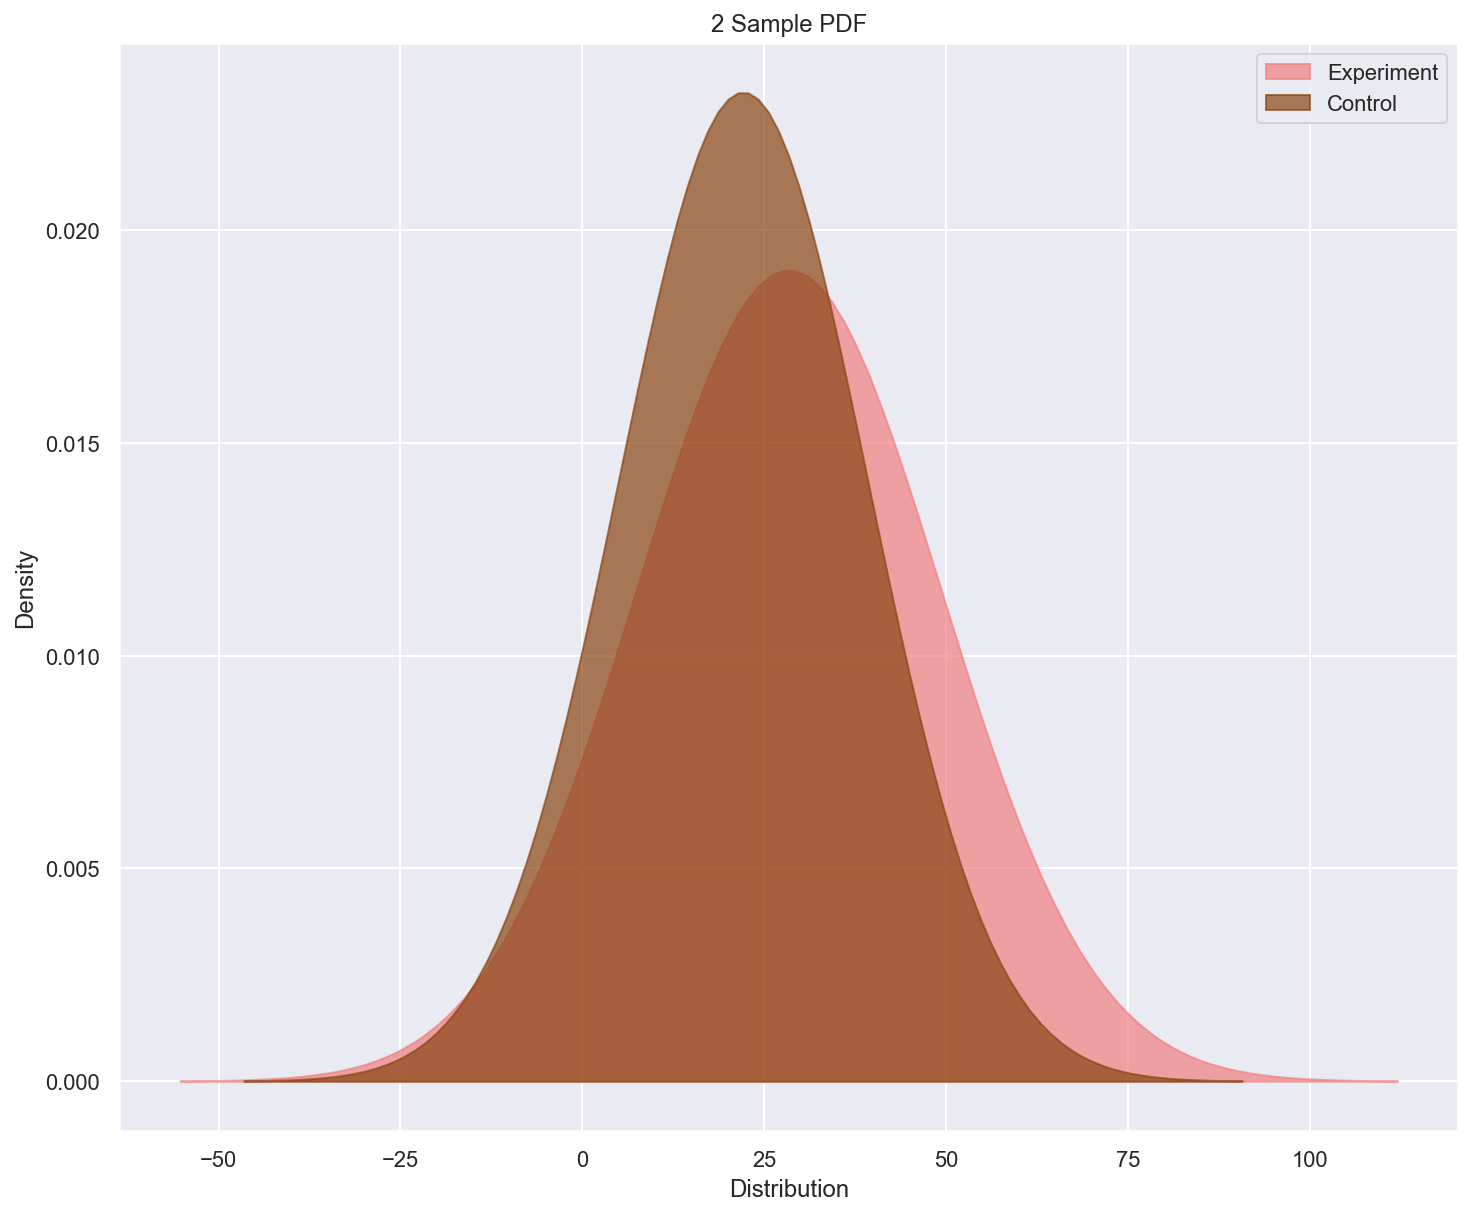

 Discount Level: 0.05
     Simple Threshold: 24
The midpoint between two means.

     Overlap: 0.9297
The total AUC.

    Superiority: 52.97
Probability that a randomly chosen sample from the first group is [higher] than one of the second group.

    Misclassification Rate: 0.4649
The chance of misclassification if using this metric alone as a predictor.


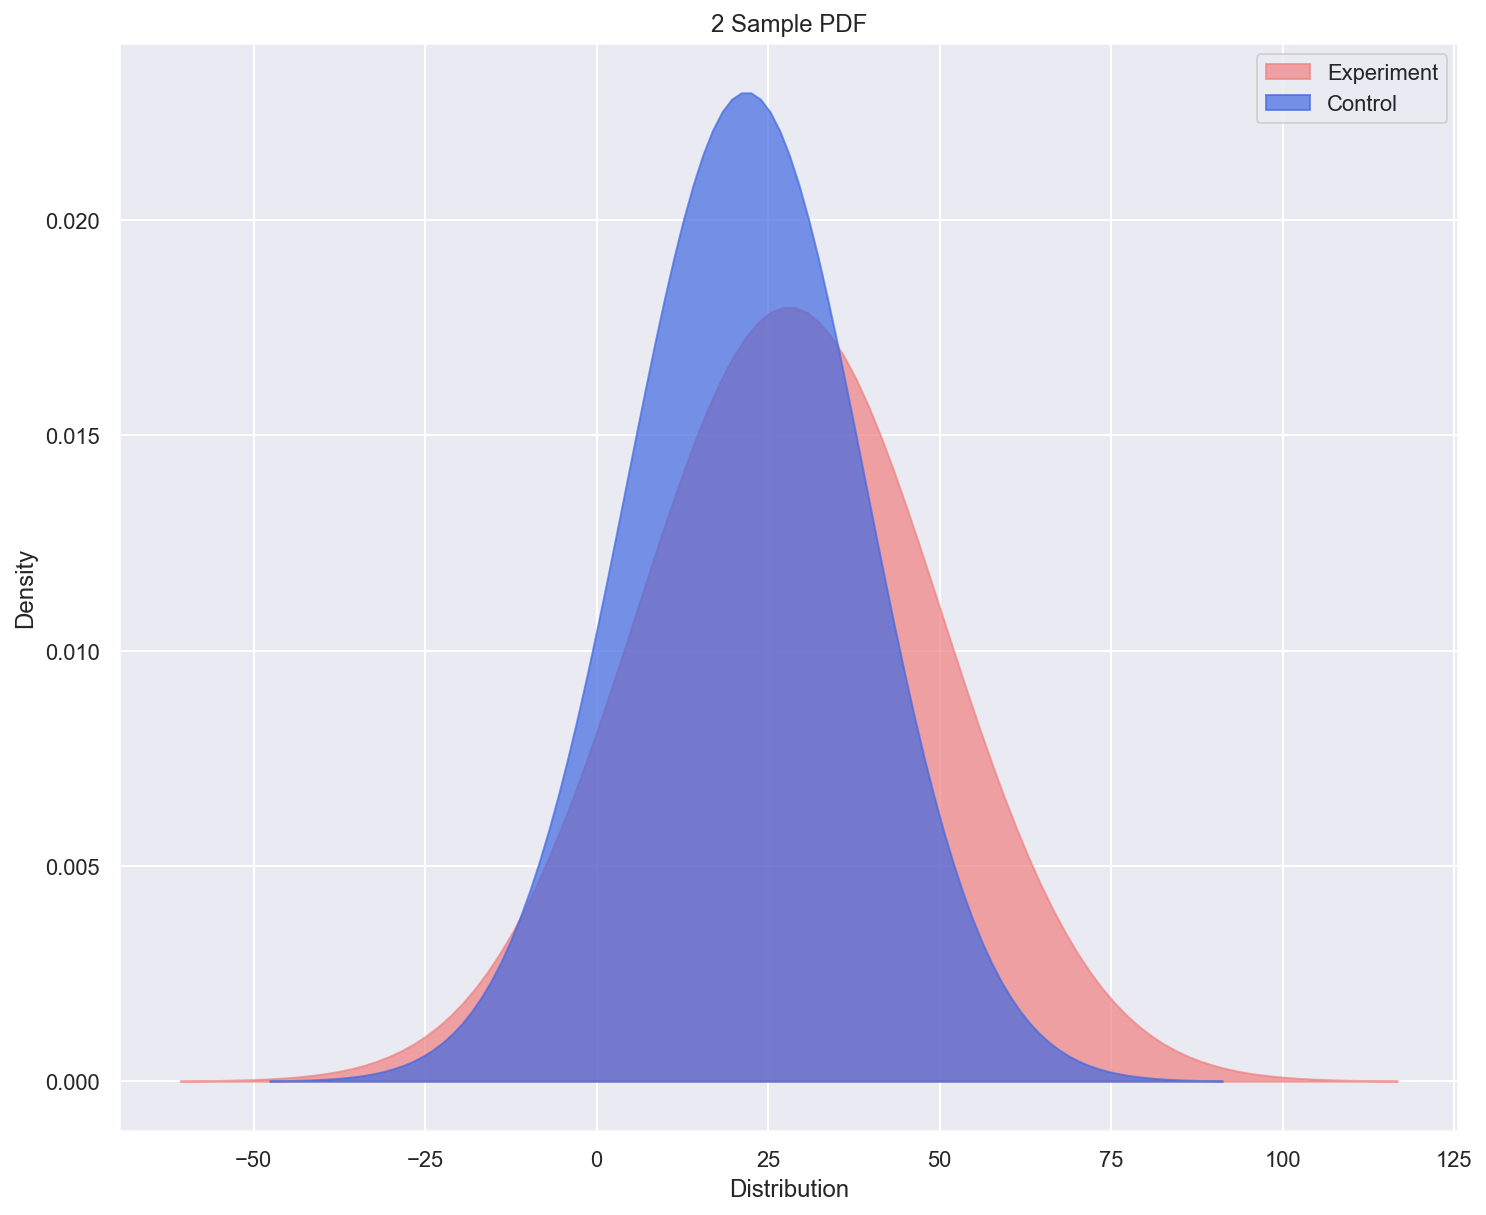

 Discount Level: 0.2
     Simple Threshold: 24
The midpoint between two means.

     Overlap: 0.882
The total AUC.

    Superiority: 52.8
Probability that a randomly chosen sample from the first group is [higher] than one of the second group.

    Misclassification Rate: 0.441
The chance of misclassification if using this metric alone as a predictor.


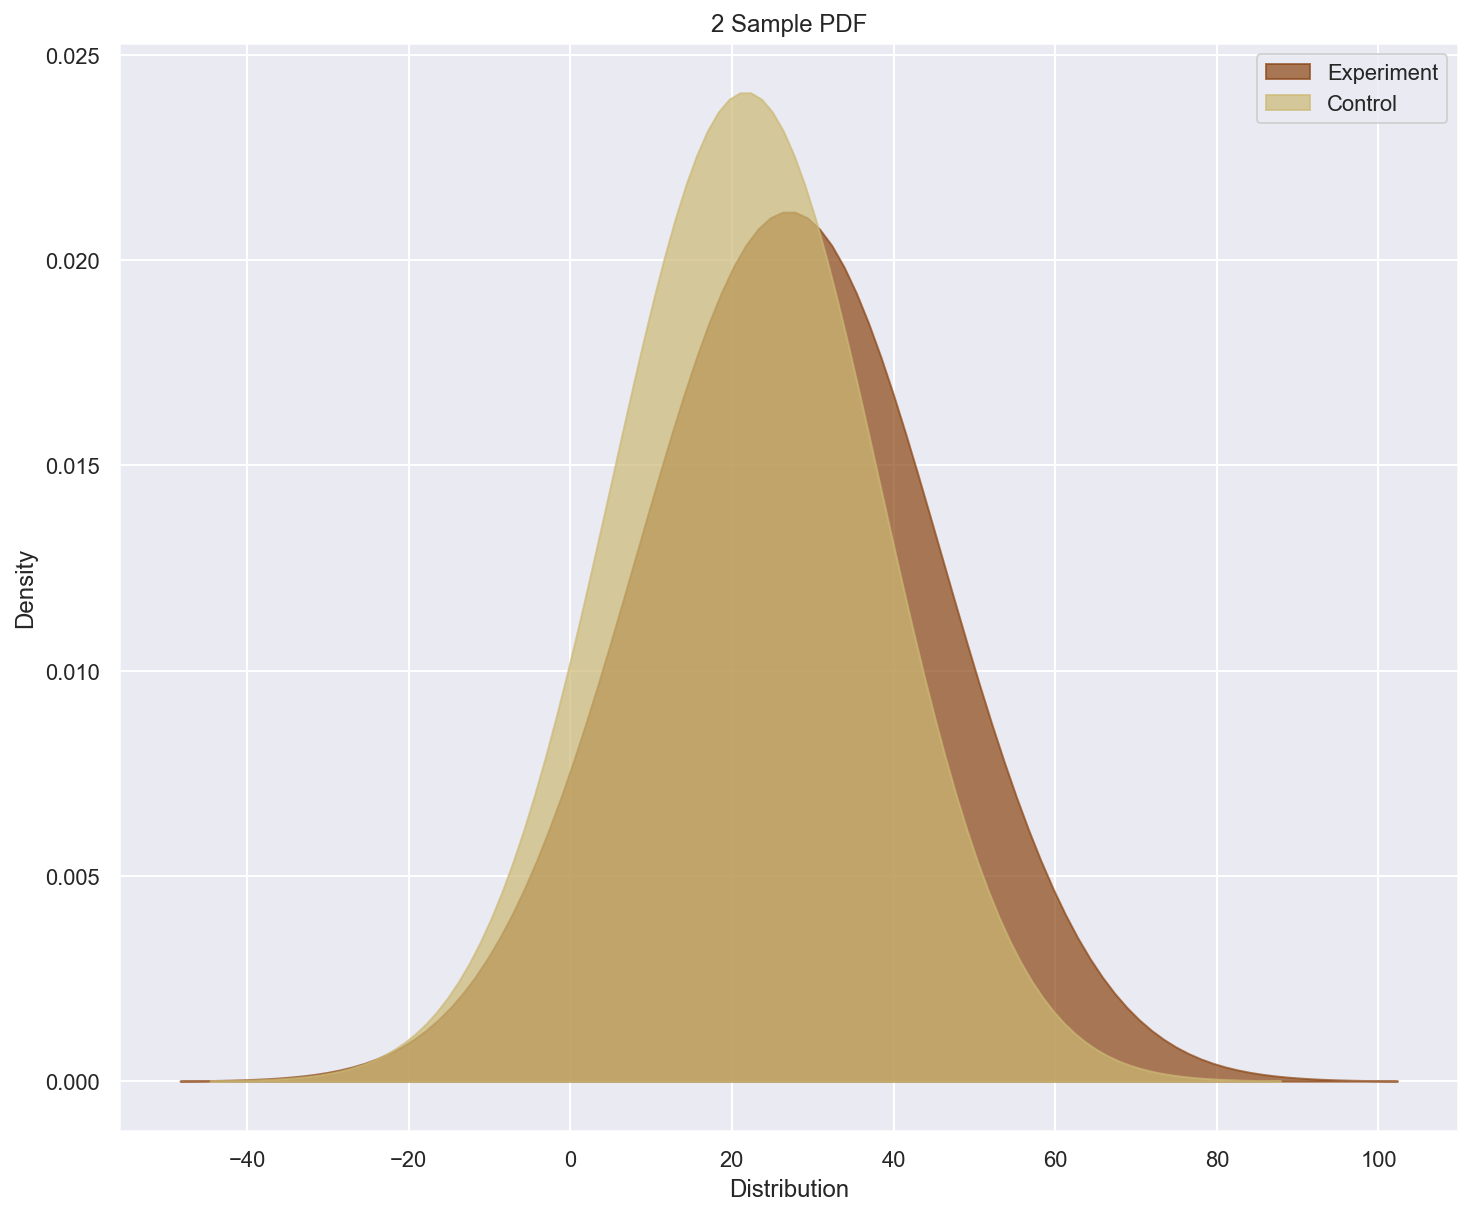

 Discount Level: 0.25
     Simple Threshold: 23
The midpoint between two means.

     Overlap: 0.7727
The total AUC.

    Superiority: 62.34
Probability that a randomly chosen sample from the first group is [higher] than one of the second group.

    Misclassification Rate: 0.3864
The chance of misclassification if using this metric alone as a predictor.


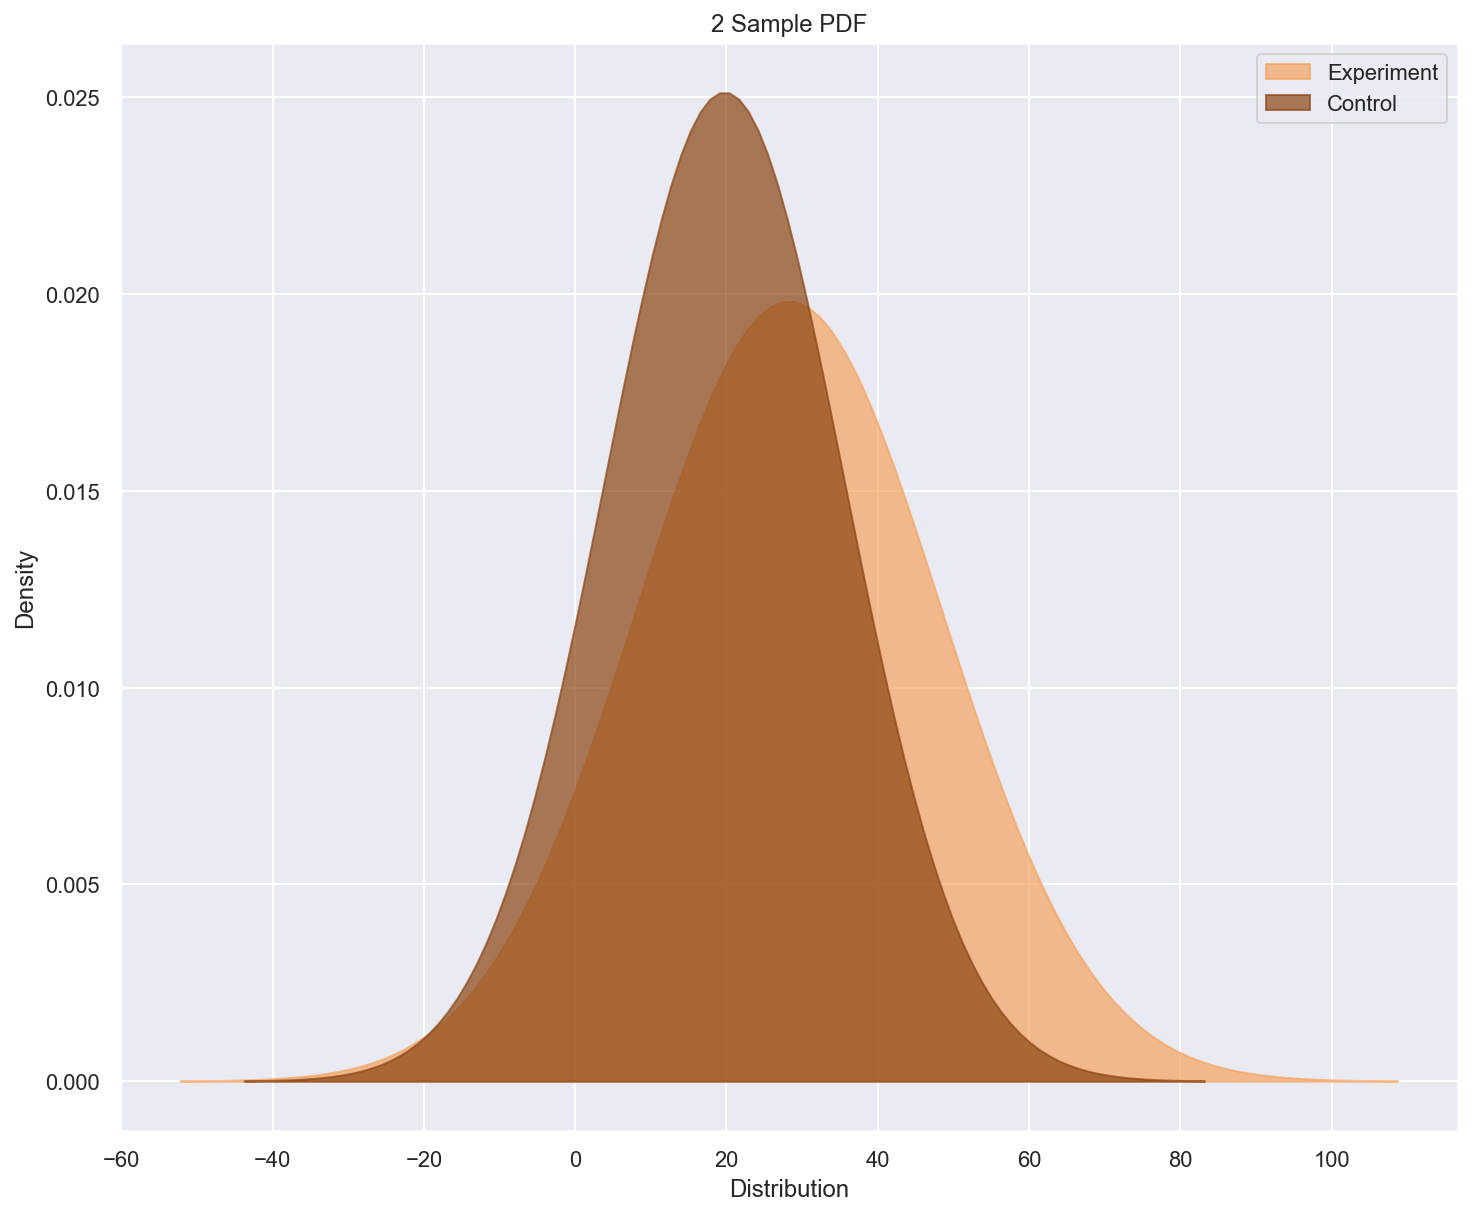

 Discount Level: 0.1
     Simple Threshold: 22
The midpoint between two means.

     Overlap: 0.8844
The total AUC.

    Superiority: 56.65
Probability that a randomly chosen sample from the first group is [higher] than one of the second group.

    Misclassification Rate: 0.4422
The chance of misclassification if using this metric alone as a predictor.


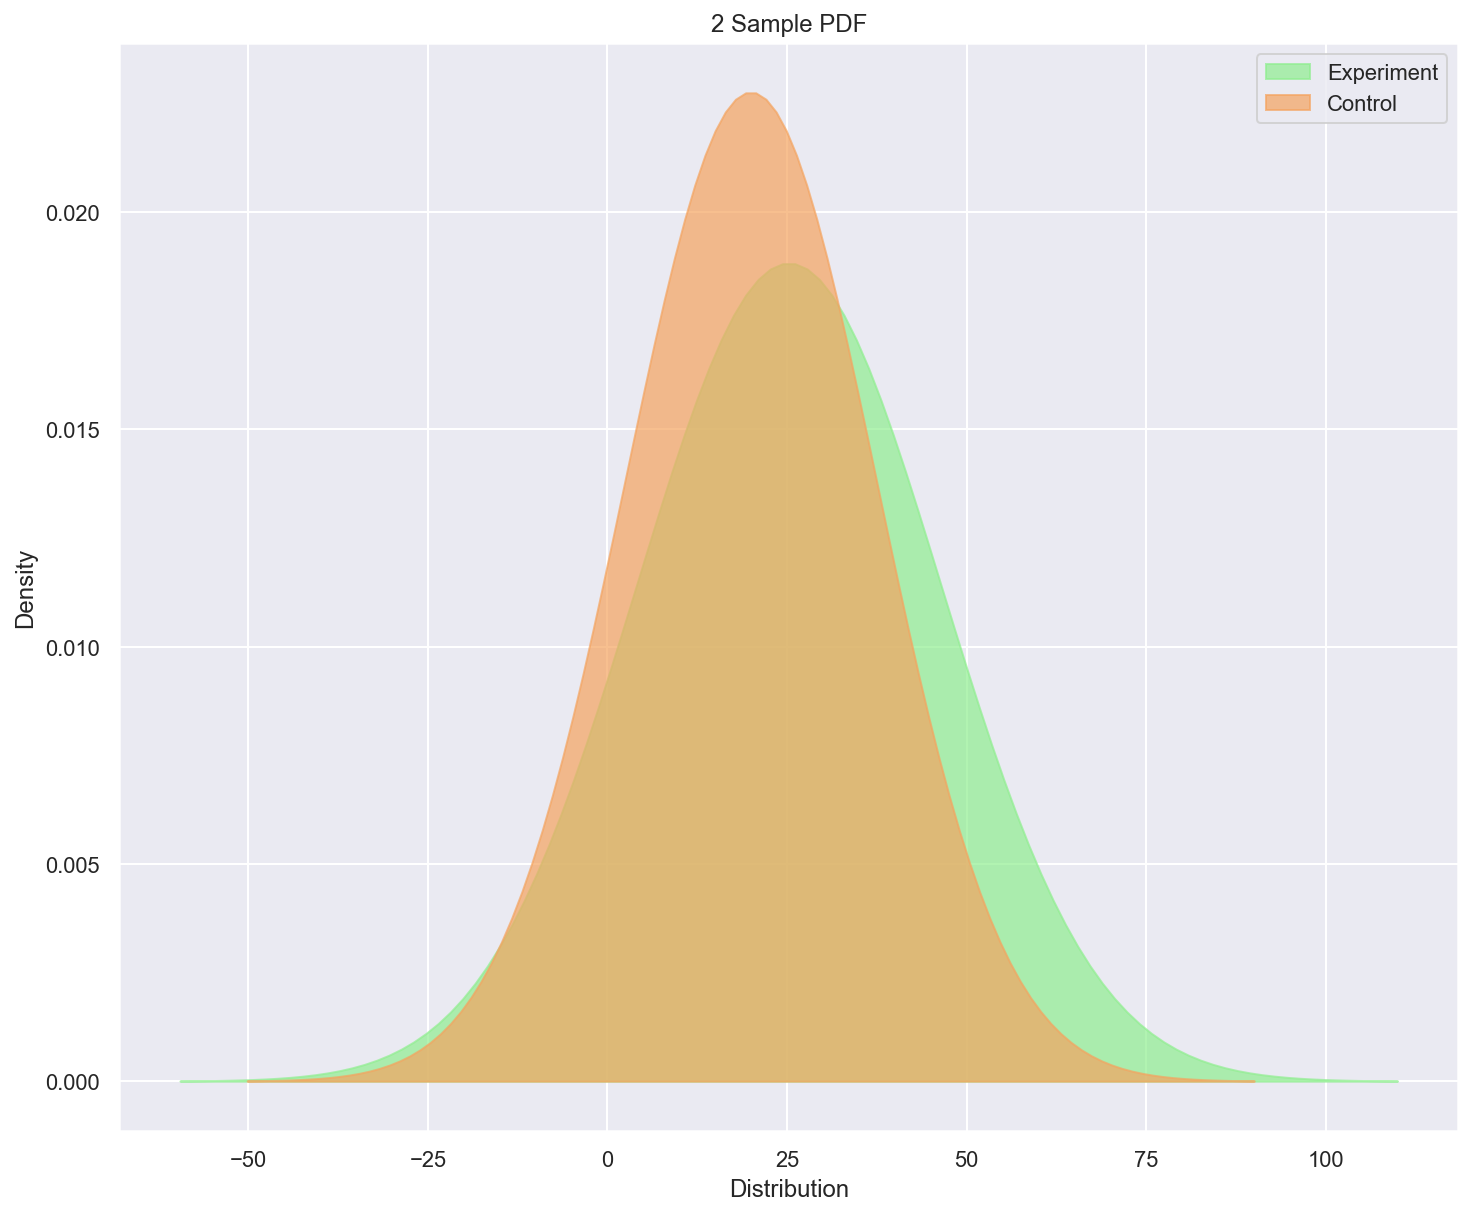

In [244]:

for i in range(len(no_discounts_)):
    print(f' Discount Level: {discount_lvs[i]}')
    dd = Cohen_d(discounts_[i], no_discounts_[i])
    plot_pdfs(discounts_[i], no_discounts_[i], cohen_d = dd)
    plt.show();

# Best Shipper

### H1 Speedy Express  ships orders with a higher dollar value than the competitors with a confidence level of 95%

### H0: there is no significant difference between Speedy Express and the other shippers

 Additionally, if we fail to accept the H0 ~ is ?? more effective by totaling UnitPrice of total orders / Freight
 


In [61]:
tables

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

In [62]:
#the three shippers
c.execute('''select * from shipper;''')
c.fetchall()

[(1, 'Speedy Express', '(503) 555-9831'),
 (2, 'United Package', '(503) 555-3199'),
 (3, 'Federal Shipping', '(503) 555-9931')]

In [63]:
#frieght and shipper cooresponding to each of the three shippers by ID
c.execute('''select freight, shipvia from 'order'; ''')
c.fetchall()

[(32.38, 3),
 (11.61, 1),
 (65.83, 2),
 (41.34, 1),
 (51.3, 2),
 (58.17, 2),
 (22.98, 2),
 (148.33, 3),
 (13.97, 2),
 (81.91, 3),
 (140.51, 1),
 (3.25, 3),
 (55.09, 1),
 (3.05, 2),
 (48.29, 3),
 (146.06, 3),
 (3.67, 3),
 (55.28, 1),
 (25.73, 3),
 (208.58, 1),
 (66.29, 3),
 (4.56, 1),
 (136.54, 1),
 (4.54, 2),
 (98.03, 2),
 (76.07, 3),
 (6.01, 1),
 (26.93, 1),
 (13.84, 3),
 (125.77, 3),
 (92.69, 2),
 (25.83, 2),
 (8.98, 1),
 (2.94, 1),
 (12.69, 1),
 (84.81, 3),
 (76.56, 1),
 (76.83, 2),
 (229.24, 3),
 (12.76, 3),
 (7.45, 1),
 (22.77, 3),
 (79.7, 1),
 (6.4, 2),
 (1.35, 2),
 (21.18, 3),
 (147.26, 2),
 (1.15, 2),
 (0.12, 1),
 (5.74, 2),
 (168.22, 2),
 (29.76, 2),
 (17.68, 2),
 (45.08, 2),
 (6.27, 2),
 (107.83, 2),
 (63.79, 2),
 (257.62, 3),
 (7.56, 3),
 (0.56, 2),
 (1.61, 3),
 (47.3, 1),
 (17.52, 2),
 (24.69, 3),
 (40.26, 2),
 (1.96, 2),
 (74.16, 2),
 (41.76, 2),
 (150.15, 3),
 (12.69, 1),
 (4.73, 2),
 (64.5, 3),
 (34.57, 3),
 (3.43, 2),
 (0.4, 3),
 (4.88, 1),
 (214.27, 1),
 (64.86, 3),
 (

In [64]:
#join unitprice form order details to shippers
c.execute('''select CompanyName, ShipVia, Freight, OrderID, UnitPrice, Quantity, Discount
            from OrderDetail, 'Order', Shipper; ''')

c.fetchall()

[('Speedy Express', 3, 32.38, 10248, 14, 12, 0.0),
 ('United Package', 3, 32.38, 10248, 14, 12, 0.0),
 ('Federal Shipping', 3, 32.38, 10248, 14, 12, 0.0),
 ('Speedy Express', 1, 11.61, 10248, 14, 12, 0.0),
 ('United Package', 1, 11.61, 10248, 14, 12, 0.0),
 ('Federal Shipping', 1, 11.61, 10248, 14, 12, 0.0),
 ('Speedy Express', 2, 65.83, 10248, 14, 12, 0.0),
 ('United Package', 2, 65.83, 10248, 14, 12, 0.0),
 ('Federal Shipping', 2, 65.83, 10248, 14, 12, 0.0),
 ('Speedy Express', 1, 41.34, 10248, 14, 12, 0.0),
 ('United Package', 1, 41.34, 10248, 14, 12, 0.0),
 ('Federal Shipping', 1, 41.34, 10248, 14, 12, 0.0),
 ('Speedy Express', 2, 51.3, 10248, 14, 12, 0.0),
 ('United Package', 2, 51.3, 10248, 14, 12, 0.0),
 ('Federal Shipping', 2, 51.3, 10248, 14, 12, 0.0),
 ('Speedy Express', 2, 58.17, 10248, 14, 12, 0.0),
 ('United Package', 2, 58.17, 10248, 14, 12, 0.0),
 ('Federal Shipping', 2, 58.17, 10248, 14, 12, 0.0),
 ('Speedy Express', 2, 22.98, 10248, 14, 12, 0.0),
 ('United Package', 2,

The following Pandas tables include the information needed to test the hypothesis and additional information that might be required to test additional dependant hypotheses.

In [65]:
shippers = pd.read_sql_query('''select CompanyName, ShipVia, Freight, OrderID, UnitPrice, Quantity, Discount
            from OrderDetail d inner join 'Order' o on d.OrderID=o.Id inner join Shipper s on o.shipvia=s.Id; ''', cnx)
shippers['OrderTotal'] = (shippers['UnitPrice'] * shippers['Quantity']) * (1 - shippers['Discount'])

shippers[:10]

,CompanyName,ShipVia,Freight,OrderId,UnitPrice,Quantity,Discount,OrderTotal
0,Federal Shipping,3,32.38,10248,14.0,12,0.00,168.00
1,Federal Shipping,3,32.38,10248,9.8,10,0.00,98.00
2,Federal Shipping,3,32.38,10248,34.8,5,0.00,174.00
3,Speedy Express,1,11.61,10249,18.6,9,0.00,167.40
4,Speedy Express,1,11.61,10249,42.4,40,0.00,1696.00
5,United Package,2,65.83,10250,7.7,10,0.00,77.00
6,United Package,2,65.83,10250,42.4,35,0.15,1261.40
7,United Package,2,65.83,10250,16.8,15,0.15,214.20
8,Speedy Express,1,41.34,10251,16.8,6,0.05,95.76
9,Speedy Express,1,41.34,10251,15.6,15,0.05,222.30


In [66]:
shippers.isna().sum()

CompanyName    0
ShipVia        0
Freight        0
OrderId        0
UnitPrice      0
Quantity       0
Discount       0
OrderTotal     0
dtype: int64

In [67]:
shippers.shape

(2155, 8)

In [68]:

speedy = shippers[shippers['CompanyName'] == 'Speedy Express']
united = shippers[shippers['CompanyName'] == 'United Package']
federal = shippers[shippers['CompanyName'] == 'Federal Shipping']
speedy[:3]

,CompanyName,ShipVia,Freight,OrderId,UnitPrice,Quantity,Discount,OrderTotal
3,Speedy Express,1,11.61,10249,18.6,9,0.00,167.40
4,Speedy Express,1,11.61,10249,42.4,40,0.00,1696.00
8,Speedy Express,1,41.34,10251,16.8,6,0.05,95.76


In this test we will be comparing the experiemenal data from Speedy Express against united and federal both.

In [69]:
print(speedy.shape,united.shape,federal.shape)

(646, 8) (864, 8) (645, 8)


In [73]:

speedy_samp = np.array(speedy["OrderTotal"])
united_samp = np.array(united["OrderTotal"])
federal_samp = np.array(federal["OrderTotal"])



C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


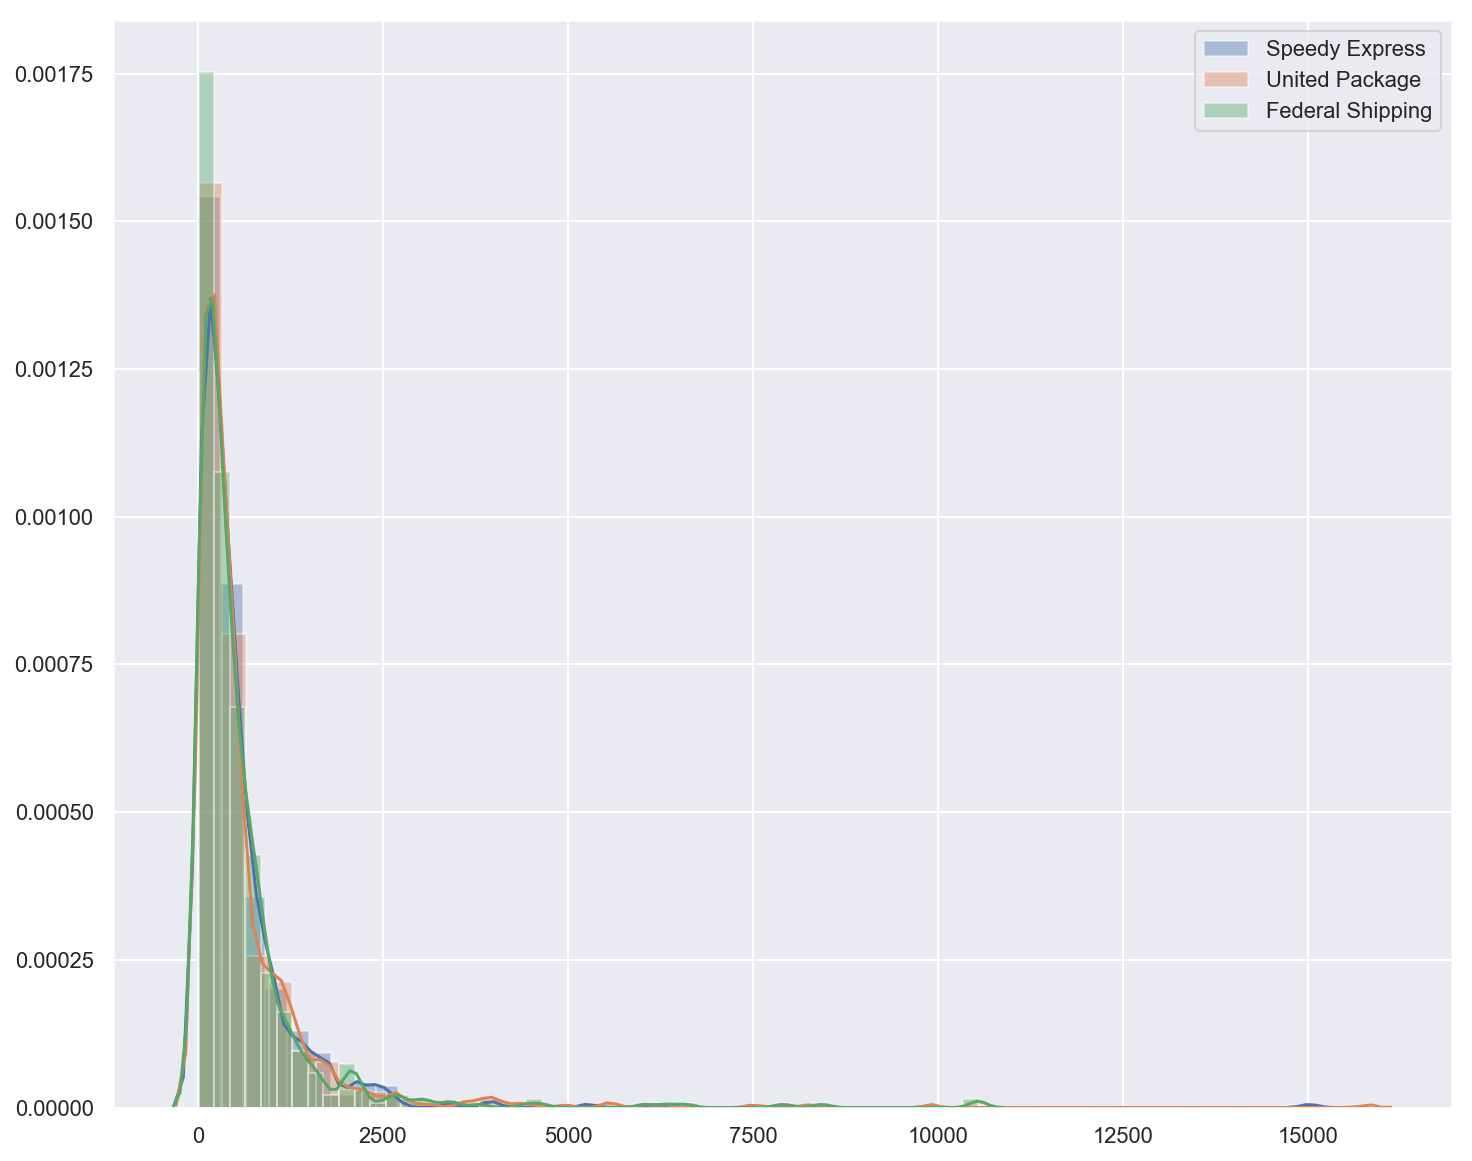

In [245]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(speedy_samp, label='Speedy Express')
sns.distplot(united_samp, label='United Package')
sns.distplot(federal_samp, label='Federal Shipping') 
plt.legend()
plt.show();

In [77]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [83]:
#takes concatenated samples
vector = np.concatenate([speedy_samp, united_samp, federal_samp])
labels = ['Speedy Express'] * len(speedy_samp) + ['United Package'] * len(united_samp) + ['Federal Shipping'] * len(federal_samp)
tukey_results = pairwise_tukeyhsd(vector,labels, 0.05)

print(tukey_results)


        Multiple Comparison of Means - Tukey HSD,FWER=0.05        
     group1          group2     meandiff   lower    upper   reject
------------------------------------------------------------------
Federal Shipping Speedy Express -54.4272 -180.9466 72.0922  False 
Federal Shipping United Package 23.1049   -95.1715 141.3813 False 
 Speedy Express  United Package 77.5321   -40.6919 195.7561 False 
------------------------------------------------------------------


### Budget shipping?

Is there one shipper that ships for less than the others when comparing Freight / Order Total?<br>
H0 = Speedy = United = Federal<br>
HA = H0 == False.


In [247]:
speedy_samp = np.array(speedy["Freight"] / speedy["OrderTotal"])
united_samp = np.array(united["Freight"] / united["OrderTotal"])
federal_samp = np.array(federal["Freight"] / federal["OrderTotal"])

In [248]:
vector = np.concatenate([speedy_samp, united_samp, federal_samp])
labels = ['Speedy Express'] * len(speedy_samp) + ['United Package'] * len(united_samp) + ['Federal Shipping'] * len(federal_samp)
tukey_results = pairwise_tukeyhsd(vector,labels, 0.05)

print(tukey_results)

      Multiple Comparison of Means - Tukey HSD,FWER=0.05      
     group1          group2     meandiff  lower  upper  reject
--------------------------------------------------------------
Federal Shipping Speedy Express -0.0344  -0.1565 0.0877 False 
Federal Shipping United Package -0.0256  -0.1397 0.0886 False 
 Speedy Express  United Package  0.0088  -0.1053 0.1229 False 
--------------------------------------------------------------


*Under Development*

Is it better to ship by bulk and ship orders over $100?

H0 OrderPrice/Frieght of orders < $100 is  > HA OrderPrice/Frieght  of >= $100

H0 = HA 
Bulk orders generally do not have a better frieght to order price ratio.

# One Category to Rule Them All

### H1: Meat/Poultry is the most lucartive category  by total UnitPrice per order being al least 100 dollars more than other categories with a confidence of 95%
### H0: There is no significant difference between the Meat/Poultry and the other products.

Additionally, if we fail to accept the H0 ~ is Meat/Poultry accounted for with "proportionately" higher UnitsInStock/UnitsOnOrder compared to other like products?



In [87]:
tables

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

In [88]:
c.execute('''select * from Category;''')
c.fetchall()

[(1, 'Beverages', 'Soft drinks, coffees, teas, beers, and ales'),
 (2,
  'Condiments',
  'Sweet and savory sauces, relishes, spreads, and seasonings'),
 (3, 'Confections', 'Desserts, candies, and sweet breads'),
 (4, 'Dairy Products', 'Cheeses'),
 (5, 'Grains/Cereals', 'Breads, crackers, pasta, and cereal'),
 (6, 'Meat/Poultry', 'Prepared meats'),
 (7, 'Produce', 'Dried fruit and bean curd'),
 (8, 'Seafood', 'Seaweed and fish')]

I had been getting a different unit price from the Product and the Order Detail tables.  I'm assuming the Order Detail is the most accurate unit price since it was more likely that that info was taken form the sale itself.

In [89]:
categories = pd.read_sql_query('''select productname, CategoryName, d.unitprice, quantity, discount, unitsinstock, unitsonorder, discontinued
                            from OrderDetail d inner join Product p on d.ProductId = p.Id
                            join category c on p.categoryid = c.id;''', cnx)
print(f'Shape: \n {categories.shape} \n NaNs: \n{categories.isna().sum()}')

meats = pd.read_sql_query('''select productname, CategoryName, d.unitprice, quantity, discount, unitsinstock, unitsonorder, discontinued
                            from OrderDetail d inner join Product p on d.ProductId = p.Id
                            join category c on p.categoryid = c.id
                            where CategoryName = 'Meat/Poultry';''', cnx)
not_meats = pd.read_sql_query('''select productname, CategoryName, d.unitprice, quantity, discount, unitsinstock, unitsonorder, discontinued
                            from OrderDetail d inner join Product p on d.ProductId = p.Id
                            join category c on p.categoryid = c.id
                            where CategoryName != 'Meat/Poultry';''', cnx)


Shape: 
 (2155, 8) 
 NaNs: 
ProductName     0
CategoryName    0
UnitPrice       0
Quantity        0
Discount        0
UnitsInStock    0
UnitsOnOrder    0
Discontinued    0
dtype: int64


In [90]:
categories['Order Total'] = (categories['UnitPrice'] * (1-categories['Discount'])) * categories['Quantity']

In [91]:
meats['Order Total'] = (meats['UnitPrice'] * (1-meats['Discount'])) * meats['Quantity']
not_meats['Order Total'] = (not_meats['UnitPrice'] * (1-not_meats['Discount'])) * not_meats['Quantity']
meats[:2]

,ProductName,CategoryName,UnitPrice,Quantity,Discount,UnitsInStock,UnitsOnOrder,Discontinued,Order Total
0,Pâté chinois,Meat/Poultry,19.2,21,0.15,115,0,0,342.72
1,Perth Pasties,Meat/Poultry,26.2,15,0.00,0,0,1,393.00


In [92]:
print(meats.shape,not_meats.shape)

(173, 9) (1982, 9)


In [257]:
meat_sample = meats['Order Total'].sample(173)
others_sample = not_meats['Order Total'].sample(173)

meat_mean = meat_sample.mean()
others_mean = others_sample.mean()
meat_sd = meat_sample.std(ddof=1)
others_sd = others_sample.std(ddof=1)
print(f'experiement mean: {meat_mean}\nand sd:  {meat_sd}\nOther categories mean: {others_mean}\nand sd: {others_sd}')

experiement mean: 942.3257774566475
and sd:  1296.7468724659823
Other categories mean: 529.8238526011561
and sd: 652.383792209841


C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


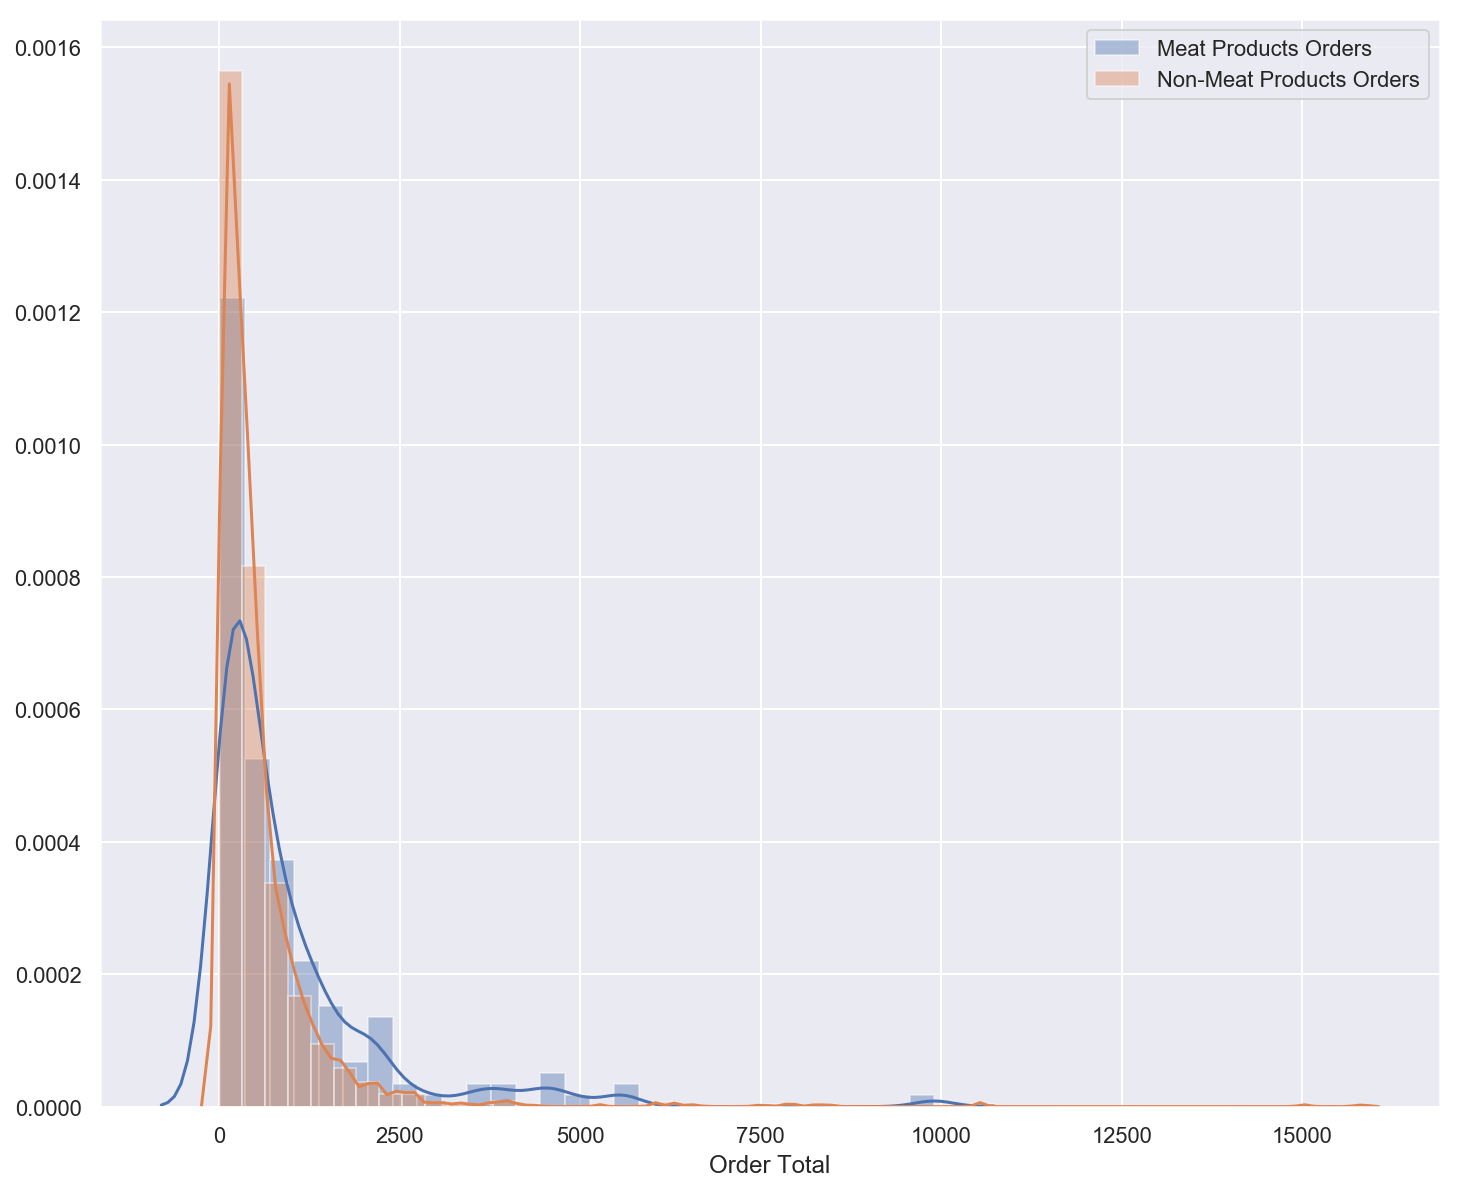

In [94]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(meats['Order Total'], label='Meat Products Orders')
sns.distplot(not_meats['Order Total'], label='Non-Meat Products Orders') 
plt.legend()
plt.show();

In [258]:
mu1 = meat_sample.mean()
sd1 = meat_sample.std(ddof=1)
mu2 = others_sample.mean()
sd2 = others_sample.std(ddof=1)
n1 = len(meat_sample)
n2 = len(others_sample)


num = (n1-1)*sd1**2 + (n2-1)*sd2**2
denom = n1 + n2 -2
pooled_sd = np.sqrt(num/denom)
sd1

1296.7468724659823

In [259]:
se = pooled_std*np.sqrt((n2+n1)/(n1*n2))
se

2.059039338071581

In [260]:
t = (((mu1 - mu2)-100) / se)
t

151.77074040176865

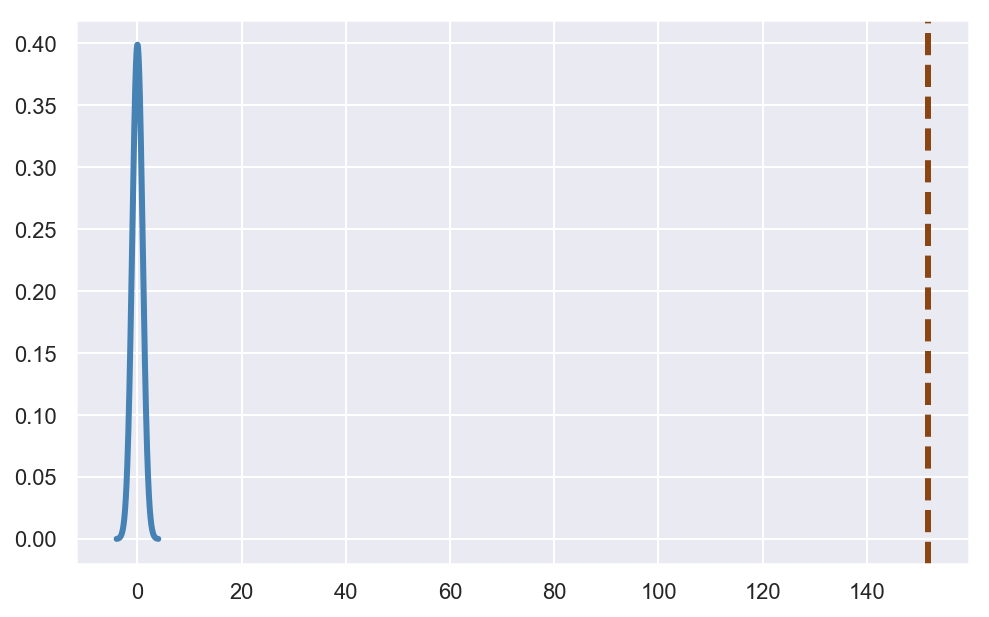

In [261]:
def visualize_t(t_stat, n_control, n_experimental):

    # initialize a matplotlib figure
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    # generate standard deviations: -4 and 4:
    xs = np.linspace(-4, 4, 500)

    # use stats.t.pdf to get values on the probability density function for the t-distribution
    
    ys= st.t.pdf(xs, (n_control+n_experimental-2), 0, 1)
    ax.plot(xs, ys, linewidth=3, color=colors[np.random.randint(len(colors))])

    ax.axvline(t_stat, color=colors[np.random.randint(len(colors))], linestyle='--', lw=3)

    plt.show()
    return None

n_control = len(ctrl_sample)
n_experimental = len(exp_sample)
visualize_t(t, n_control, n_experimental)

In [99]:
from scipy.stats import ttest_ind
tstat, p_val = ttest_ind(exp_sample, ctrl_sample)
p_val

0.03406423184262174

### Non-Parametric

In [104]:
#testing the hypothesis, -100 added to the equation to account for the $100 difference we are predicting

first_diff = (meats['Order Total'].mean() - not_meats['Order Total'].mean()) - 100
first_diff

285.93290157370075

In [105]:


total_diffs = []
for i in range(10000):
    meat_sample = categories['Order Total'].sample(int(categories.shape[0]/2))
    others_sample = categories['Order Total'].drop(exp_sample.index, axis=0)
    diff = exp_sample.mean() - ctrl_sample.mean()
    total_diffs.append(diff)


In [106]:
meat_sample = categories['Order Total'].sample(int(categories.shape[0]/2))
others_sample = categories['Order Total'].drop(exp_sample.index, axis=0)
others_sample.shape

(1078,)

In [148]:
total_diffs[:5]

[15.04409090564559,
 34.7874909806668,
 6.412735914801374,
 84.9737328777801,
 11.64743124152676]

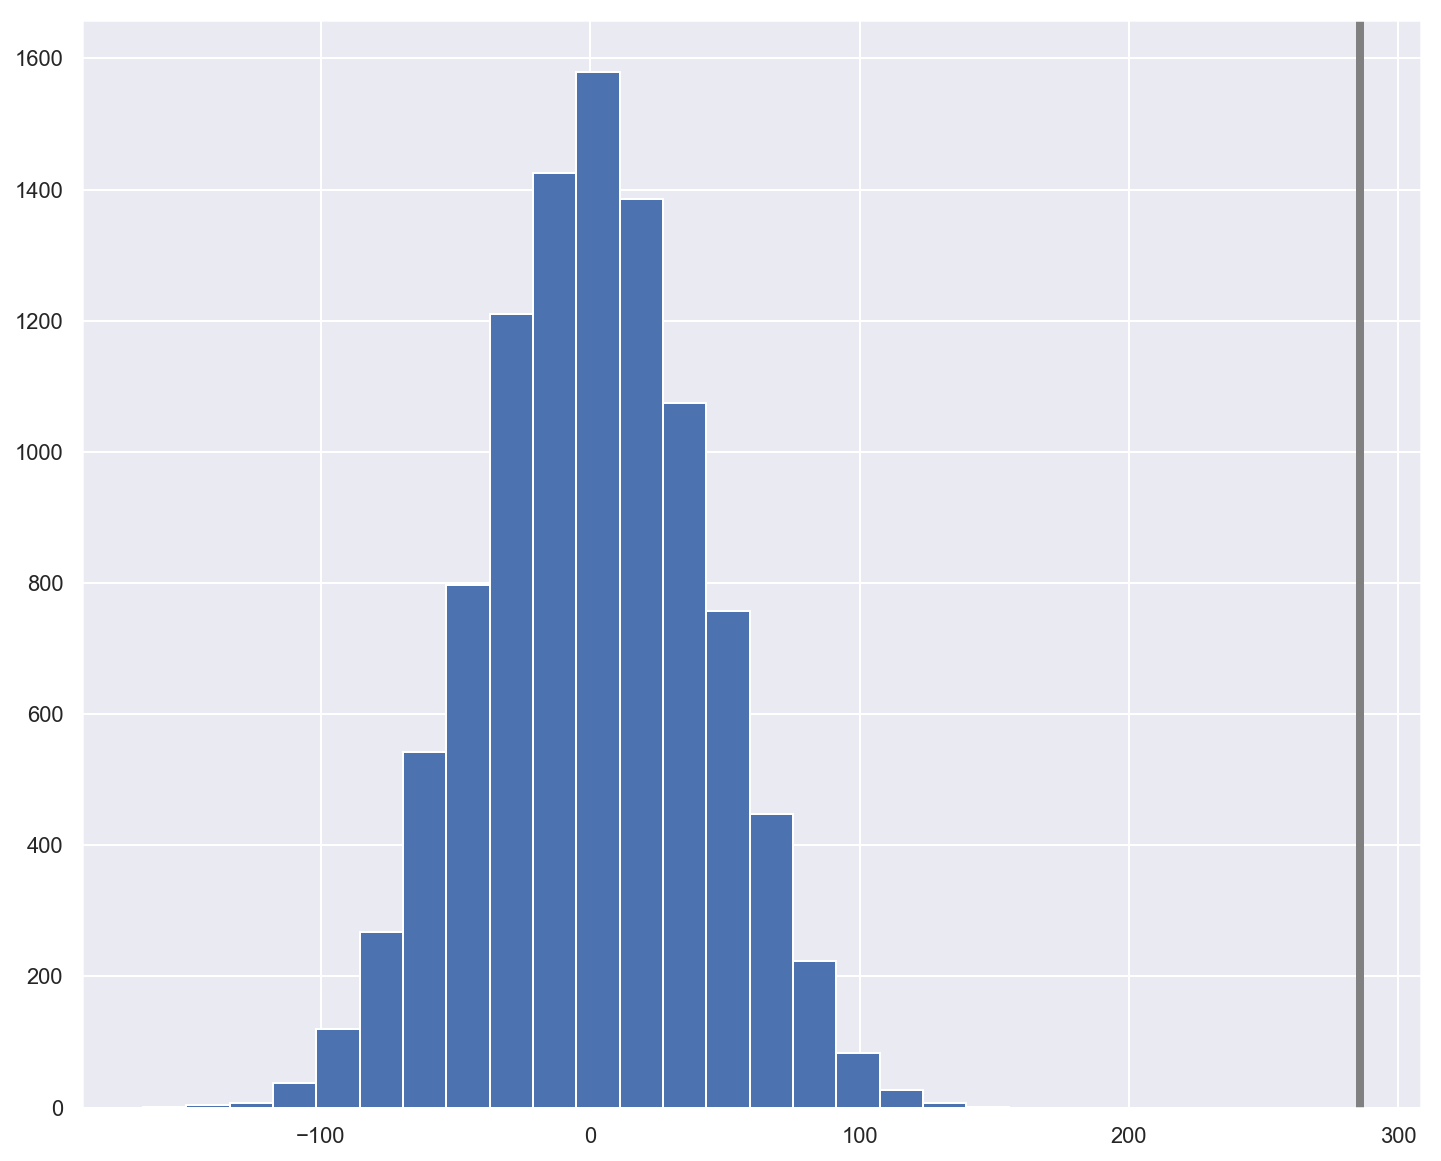

In [107]:

plt.hist(total_diffs, bins=20)
plt.axvline(first_diff, c=colors[np.random.randint(len(colors))], lw=4)

In [114]:

count = 0
for diff in total_diffs:
    if diff >= first_diff:
        count += 1
print(f'{count} out of 1000 tests have orders of meat that are lower in price.\n{count / len(total_diffs)}')

0 out of 1000 tests have orders of meat that are lower in price.
0.0
0.20205270492265742
1.2761144596539125


### Visualiztion using Effect Size

942.3257774566475 529.8238526011561


942.3257774566475 529.8238526011561
     Simple Threshold: 736
The midpoint between two means.

     Overlap: 0.4127
The total AUC.

    Superiority: 31.33
Probability that a randomly chosen sample from the first group is [higher] than one of the second group.

    Misclassification Rate: 0.2063
The chance of misclassification if using this metric alone as a predictor.


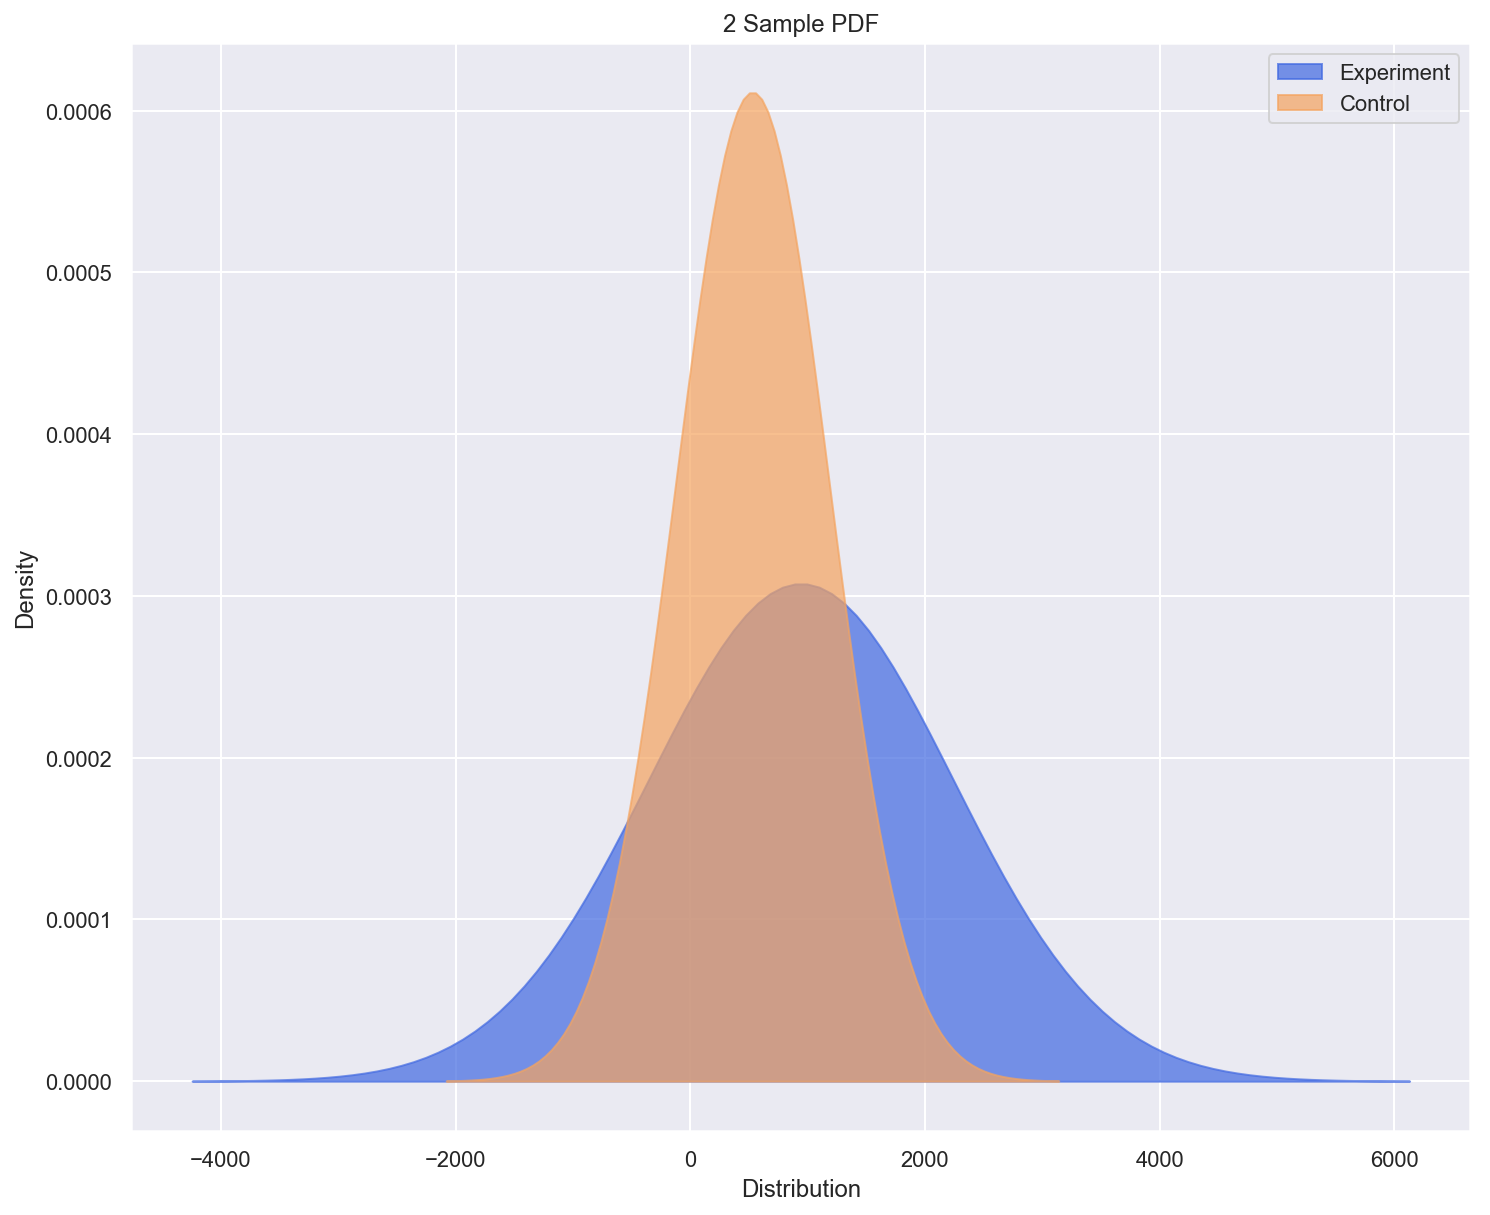

In [265]:
meat_rv = scipy.stats.norm(mu1, sd1)
not_meat_rv = scipy.stats.norm(mu2, sd2)
print(mu1,mu2)

### ###

dd = Cohen_d(meat_sample, others_sample)
plot_pdfs(meat_sample, others_sample, dd)

In [ ]:
###Needs Jeff's Help###

plt.figure(figsize=(12,10))

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= st.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= st.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= st.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= st.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= st.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= st.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='white',
                 alpha=0.35)

plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error")

### Summary

We can pretty safely reject the null hypothesis and accept the alternative that there is a statistical difference that meat orders are $100 more than orders from other categores.<br>It's worth noting that this data is non-parametric and normal distribution certainly doesn't apply.  We might decide to transofrm this data further to account for the extreme outliers in the meat orders.

### Properly Accounted for?

The secondary test proposed above was to see if Northwind Traders are favoring meat products because of their higher earning power. 

H0 = other categories and the Meat/Poultery category have equal distribution of UnitsInStock/UnitsOnOrder.
HA = others UnitsInStock < meat UnitsInStock.

With this test we hope to find larger stores of meat products on hand.  Traders could be preparing for eventual meat orders.  Traders could also be hogging up valuable freezer space.  This info alone doesn't tell us much without context but we must always remember Goldhart's law and be careful not to be too transparent with our measured metrics.

In [267]:
meats.columns

Index(['ProductName', 'CategoryName', 'UnitPrice', 'Quantity', 'Discount',
       'UnitsInStock', 'UnitsOnOrder', 'Discontinued', 'Order Total'],
      dtype='object')

In [280]:
total_stock = meats['UnitsInStock']
meat_stock = meats['UnitsInStock']
others_stock = not_meats['UnitsInStock']

first_diff = meat_stock.mean() - others_stock.mean()
first_diff

-13.755592237653332

In [ ]:
total_diffs = []
for i in range(10000):
    meat_sample = total_stock['Order Total'].sample(int(categories.shape[0]/2))
    others_sample = total_stock['Order Total'].drop(exp_sample.index, axis=0)
    diff = exp_sample.mean() - ctrl_sample.mean()
    total_diffs.append(diff)

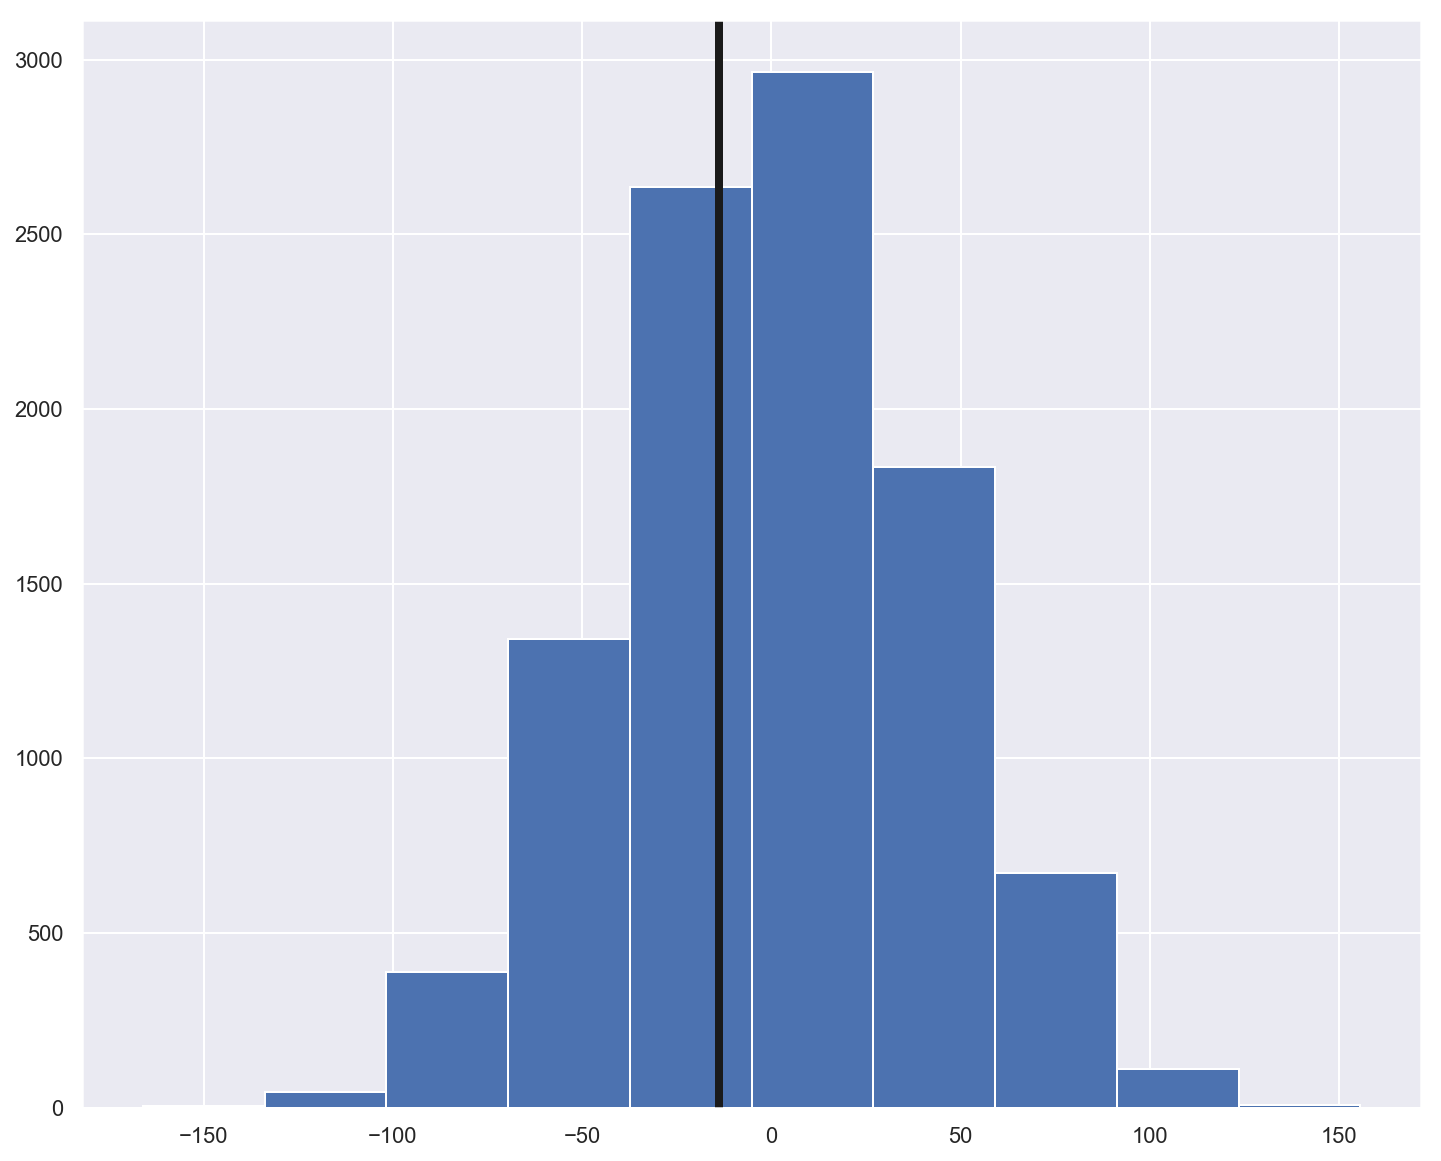

In [285]:
plt.hist(total_diffs)
plt.axvline(first_diff, c='k', lw=4)
plt.show();

We can probably stop this experiment at this point.  It is looking like we will most likely fail to reject the null hypothesis.

# Bread and Butter Region

### H1: The western region is the most profitable regionby quantity of products shipped with a confidence of 95%
### H0: There is no significant difference between the western region and the other regions.
 
 by 20%
 by 80%
    within the western region ~ San Francisco is the most profitable territory by 5% total Quantity of items shipped
    by the same 80/20 rule


join region to territories by regionID to EmpolyeeTerritories by TerrirotyID to Employees by EmployeeID to Orders by EmpolyeeID to Order Details by OrderID group by unitprice * quantity.  query the territories again by just quanity.


In [89]:
tables

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

The following are a few test calls on different tables in preperation for reaching across five tables to join region on order details.

In [90]:
c.execute('''select regiondescription from Region;''').fetchall()

[('Eastern',), ('Western',), ('Northern',), ('Southern',)]

In [91]:
c.execute('''select territorydescription from Territory order by TerritoryDescription desc;''').fetchall()

[('Wilton',),
 ('Westboro',),
 ('Troy',),
 ('Tampa',),
 ('Southfield',),
 ('Seattle',),
 ('Scottsdale',),
 ('Savannah',),
 ('Santa Monica',),
 ('Santa Cruz',),
 ('Santa Clara',),
 ('San Francisco',),
 ('Roseville',),
 ('Rockville',),
 ('Redmond',),
 ('Racine',),
 ('Providence',),
 ('Portsmouth',),
 ('Phoenix',),
 ('Philadelphia',),
 ('Orlando',),
 ('Neward',),
 ('New York',),
 ('New York',),
 ('Morristown',),
 ('Minneapolis',),
 ('Menlo Park',),
 ('Mellvile',),
 ('Louisville',),
 ('Hollis',),
 ('Hoffman Estates',),
 ('Greensboro',),
 ('Georgetow',),
 ('Findlay',),
 ('Fairport',),
 ('Edison',),
 ('Denver',),
 ('Dallas',),
 ('Columbia',),
 ('Colorado Springs',),
 ('Chicago',),
 ('Cary',),
 ('Campbell',),
 ('Cambridge',),
 ('Braintree',),
 ('Boston',),
 ('Bloomfield Hills',),
 ('Bentonville',),
 ('Bellevue',),
 ('Bedford',),
 ('Beachwood',),
 ('Austin',),
 ('Atlanta',)]

In [92]:
c.execute('''select region from Employee;''').fetchall()[:5]

[('North America',),
 ('North America',),
 ('North America',),
 ('North America',),
 ('British Isles',)]

In [93]:
c.execute('''select Territoryid from EmployeeTerritory;''').fetchall()[:5]

[('06897',), ('19713',), ('01581',), ('01730',), ('01833',)]

In [94]:
c.execute('''select shipcity from 'Order';''').fetchall()[:5]

[('Reims',), ('Münster',), ('Rio de Janeiro',), ('Lyon',), ('Charleroi',)]

In [95]:
c.execute('''select discount from 'OrderDetail';''').fetchall()[:5]
q = '''select * from 'Order'; '''
pd.read_sql_query(q, cnx)[:2]

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany


In [96]:
c.execute('''select discount from 'OrderDetail';''').fetchall()[:5]
q = '''select * from 'OrderDetail'; '''
pd.read_sql_query(q, cnx)[:2]

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0


The long join statement.

In [123]:

c.execute('''select regiondescription, territorydescription, shipregion, shipcountry, unitprice, quantity, discount
            from region r join Territory t on r.id=t.regionid
            join EmployeeTerritory et on t.id=et.territoryid
            join Employee e on et.Employeeid=e.id
            join 'Order' o on e.id=o.employeeid
            join OrderDetail od on o.id=od.OrderId;''').fetchall()

[('Eastern', 'Providence', 'Western Europe', 'France', 14, 12, 0.0),
 ('Eastern', 'Morristown', 'Western Europe', 'France', 14, 12, 0.0),
 ('Eastern', 'Edison', 'Western Europe', 'France', 14, 12, 0.0),
 ('Eastern', 'New York', 'Western Europe', 'France', 14, 12, 0.0),
 ('Eastern', 'New York', 'Western Europe', 'France', 14, 12, 0.0),
 ('Eastern', 'Mellvile', 'Western Europe', 'France', 14, 12, 0.0),
 ('Eastern', 'Fairport', 'Western Europe', 'France', 14, 12, 0.0),
 ('Eastern', 'Providence', 'Western Europe', 'France', 9.8, 10, 0.0),
 ('Eastern', 'Morristown', 'Western Europe', 'France', 9.8, 10, 0.0),
 ('Eastern', 'Edison', 'Western Europe', 'France', 9.8, 10, 0.0),
 ('Eastern', 'New York', 'Western Europe', 'France', 9.8, 10, 0.0),
 ('Eastern', 'New York', 'Western Europe', 'France', 9.8, 10, 0.0),
 ('Eastern', 'Mellvile', 'Western Europe', 'France', 9.8, 10, 0.0),
 ('Eastern', 'Fairport', 'Western Europe', 'France', 9.8, 10, 0.0),
 ('Eastern', 'Providence', 'Western Europe', 'Franc

The following Pandas tables include the information needed to test the hypothesis and additional information that might be required to test additional dependant hypotheses.

In [154]:
q = '''select regiondescription, territorydescription, shipregion, shipcountry, unitprice, quantity, discount
            from region r join Territory t on r.id=t.regionid
            join EmployeeTerritory et on t.id=et.territoryid
            join Employee e on et.Employeeid=e.id
            join 'Order' o on e.id=o.employeeid
            join OrderDetail od on o.id=od.OrderId
            where RegionDescription == 'Western';'''
q2 = '''select regiondescription, territorydescription, shipregion, shipcountry, unitprice, quantity, discount
            from region r join Territory t on r.id=t.regionid
            join EmployeeTerritory et on t.id=et.territoryid
            join Employee e on et.Employeeid=e.id
            join 'Order' o on e.id=o.employeeid
            join OrderDetail od on o.id=od.OrderId
            where RegionDescription != 'Western';'''



west = pd.read_sql_query(q, cnx)
not_west = pd.read_sql_query(q2, cnx)

print(west.shape, not_west.shape, regions.shape)

(2600, 7) (7529, 7) (10129, 1)


In [157]:
west['Order Total'] = (west['UnitPrice'] * (1-west['Discount'])) * west['Quantity']
not_west['Order Total'] = (not_west['UnitPrice'] * (1-not_west['Discount'])) * not_west['Quantity']


In [159]:
west_samp = west['Quantity'].sample(2600)
ctrl_samp = not_west['Quantity'].sample(2600)
regions = west['Quantity'] + not_west['Quantity']

(2600, 8) (7529, 8)


C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


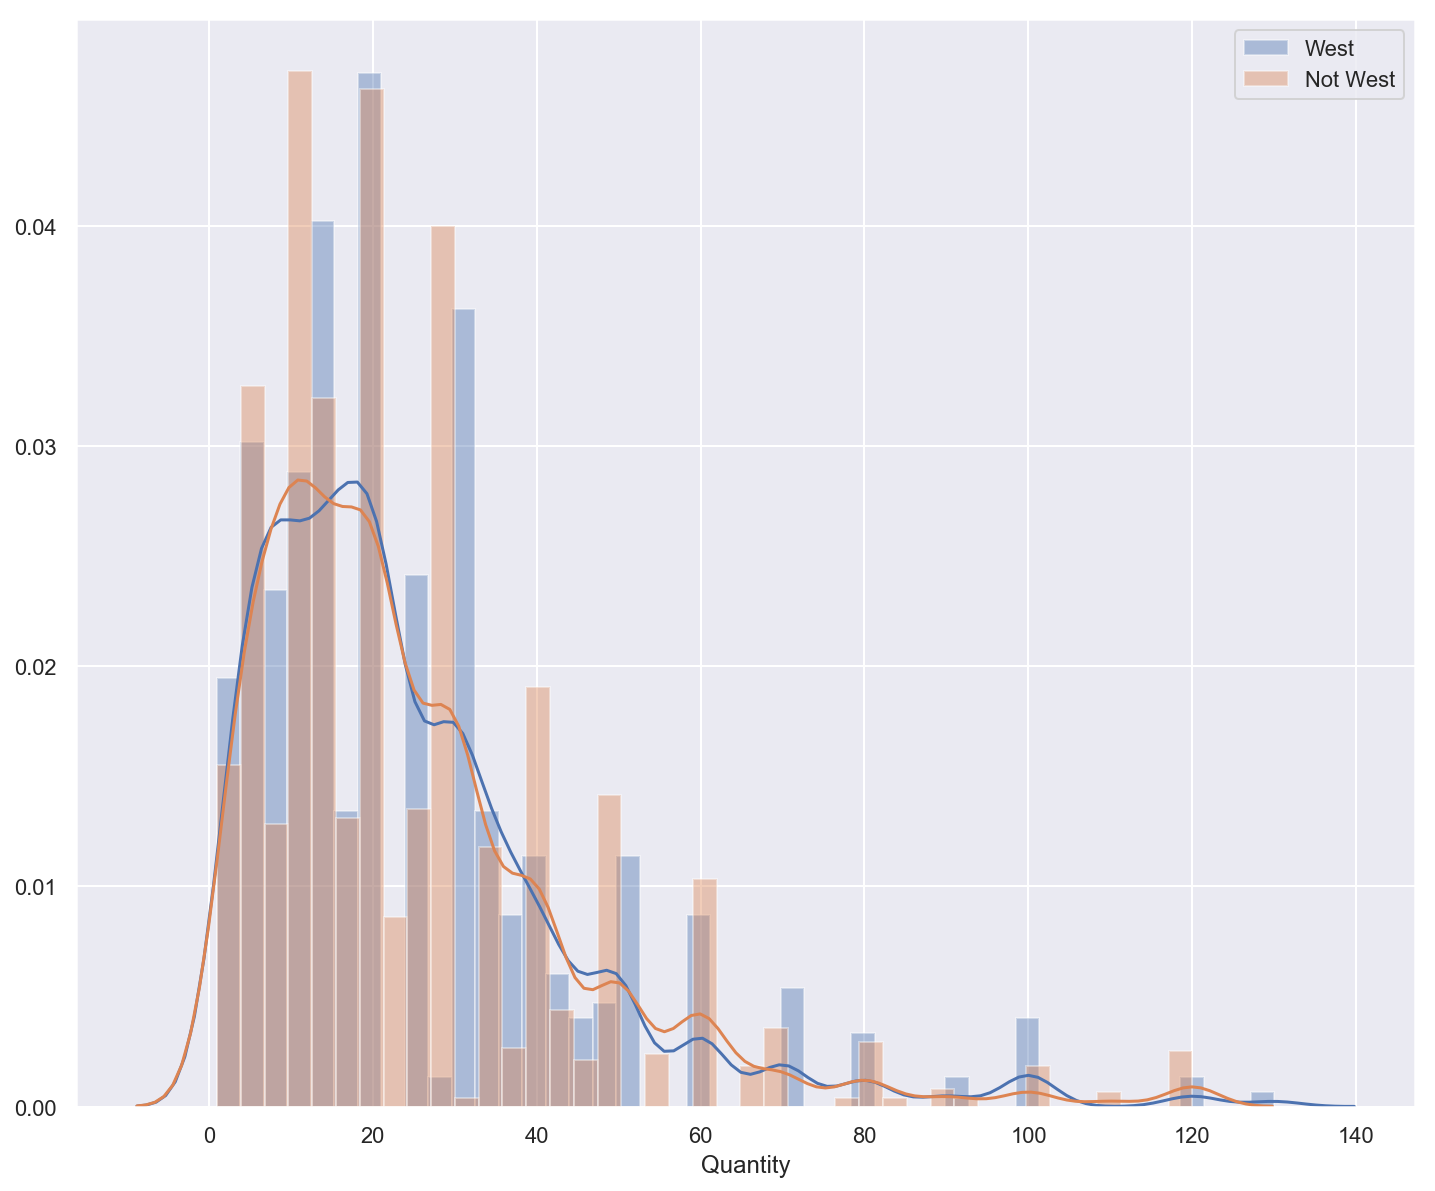

In [127]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(west_samp, label='West')
sns.distplot(ctrl_samp, label='Not West') 
plt.legend()
plt.show();

In [133]:
from scipy.stats import ttest_ind
tstat, p_val = ttest_ind(west_samp, ctrl_samp,  equal_var=False)
p_val

0.8657942921353747

In [161]:
west_mean, not_west_mean = np.mean(west_samp), np.mean(ctrl_samp)
orig_diff = abs(west_mean - not_west_mean)
orig_diff

1.3961538461538439

In [162]:
region_diffs = []
for i in range(1000):
    west_regions = regions.sample(int(regions.values.shape[0]/2))
    not_west_regions = regions.drop(west_regions.index, axis=0)
    diff = west_regions.mean() - not_west_regions.mean()
    region_diffs.append(diff)

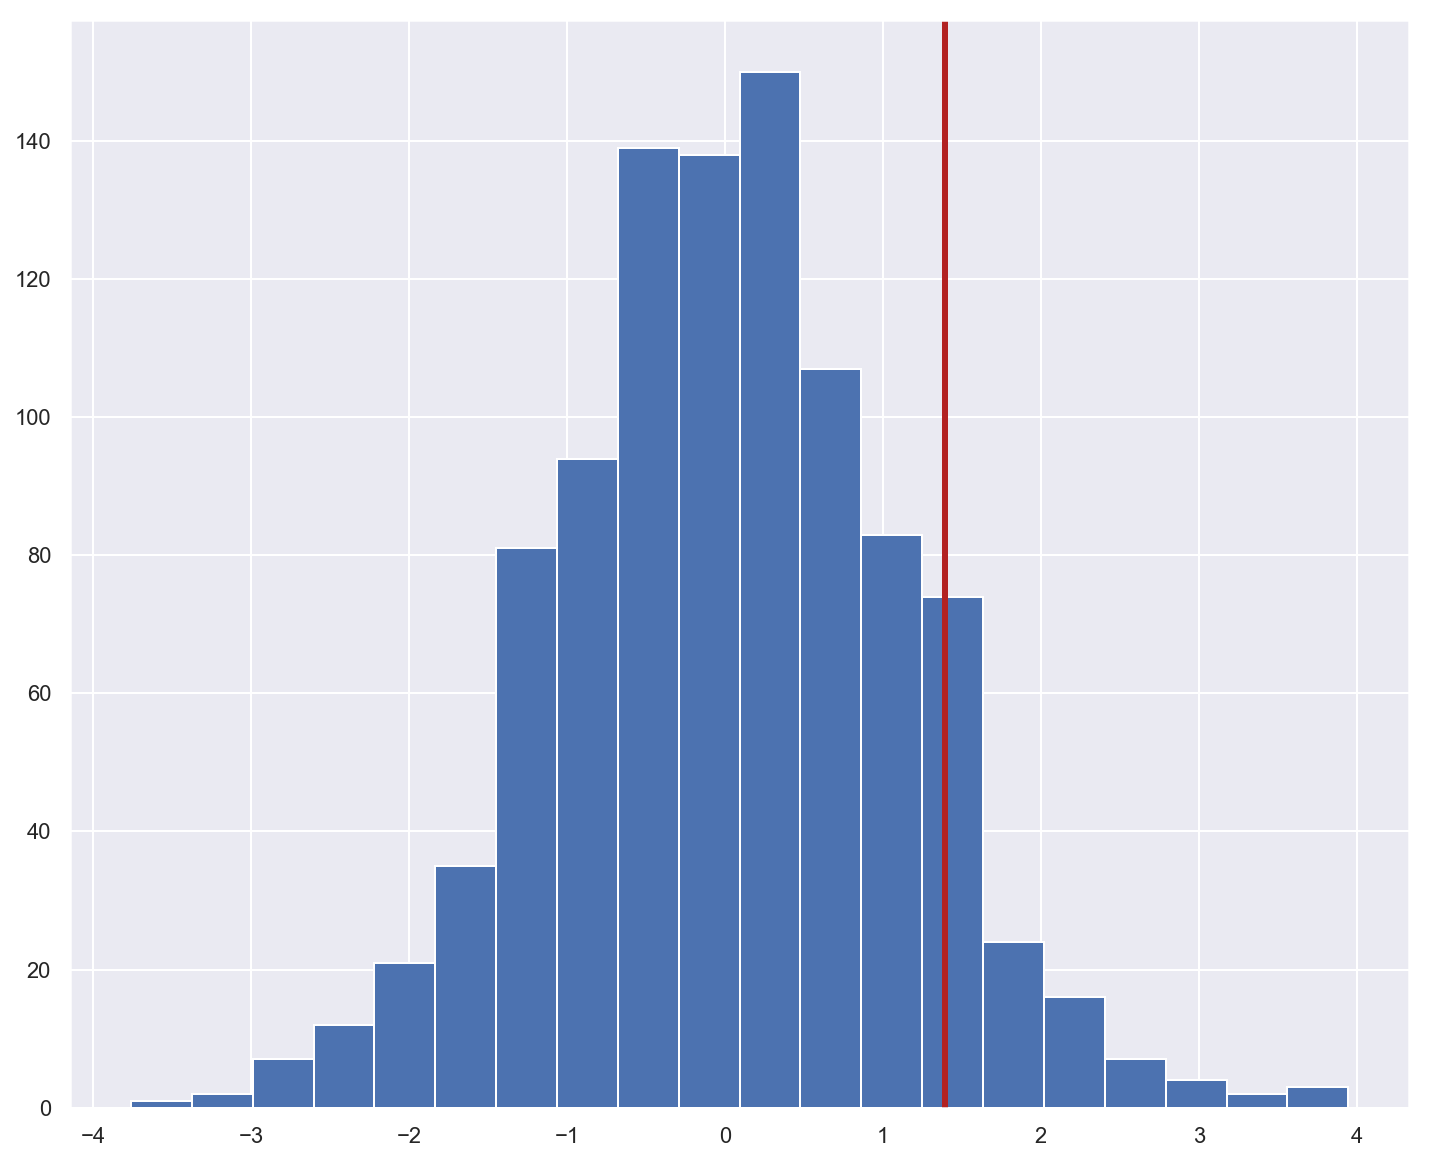

In [163]:
plt.hist(region_diffs, bins =20)
plt.axvline(orig_diff, c=colors[np.random.randint(len(colors))], lw = 3)

In [166]:
count = 0
for diff in region_diffs:
    if diff >= orig_diff:
        count += 1
print(f'{count} out of 1000 tests have a higher quantity than when shipping to SF. : {(count / len(region_diffs))*100}%')

96 out of 1000 tests have a higher quantity than when shipping to SF. : 9.6%


In [116]:

ttest, P_val = ttest_ind(west['Quantity'].values, not_west['Quantity'].values)
P_val

0.30205781258806796

### Summary

This P value is a little high.  Our informal test tells us that we are not always shipping more products to San Fransi.  While these results fail to reject the H0.  It might still be worth doing further tests regarding San Francisco as a metropolitain hub.

In [249]:
San Fransisco is the hub of the west and the 80/20 rule applies.  
HA = San Fransisco gets 80% of the business in the West Region.
H0 = SF < 80% orders in the West Region

SyntaxError: invalid syntax (<ipython-input-249-977b57adc247>, line 1)

In [186]:
westcopy = west.copy()
westcopy['TerritoryDescription'].unique()

array(['Phoenix', 'Scottsdale', 'Bellevue', 'Redmond', 'Seattle',
       'Hoffman Estates', 'Chicago', 'Denver', 'Colorado Springs',
       'Santa Monica', 'Menlo Park', 'San Francisco', 'Campbell',
       'Santa Clara', 'Santa Cruz'], dtype=object)

In [187]:
type(westcopy['TerritoryDescription'][0]) == str

True

In [251]:
cities_less_SF = ['Phoenix', 'Scottsdale', 'Bellevue', 'Redmond', 'Seattle',
       'Hoffman Estates', 'Chicago', 'Denver', 'Colorado Springs',
       'Santa Monica', 'Menlo Park', 'Campbell',
       'Santa Clara', 'Santa Cruz']
westcopy['TerritoryDescription'].replace('San Francisco', 1, inplace=True)
westcopy['TerritoryDescription'].replace([cities_less_SF], 0, inplace=True)
westcopy['TerritoryDescription'].mean()

NameError: name 'westcopy' is not defined

In [253]:
1 / (len(cities_less_SF)+1)

0.06666666666666667

We can tell right away that SF doesn't get any more orders than the other cities.  This HA is rejected and we fail to reject the H0.  Some tests can end here and don't have to be statistically analysed.